## Advanced Regression Assignment

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv("train.csv")

# find number of rows and columns
print("Shape of data: ",sales.shape)

sales.head()

Shape of data:  (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

__It seems a lot of collumns are having null values. Which needs to be handled.__

In [4]:
# function to print the percentage of null values for any column
def nulls(colName):
    columnSeries = sales[colName]
    totalValues = columnSeries.shape[0] 
    totalNulls = columnSeries.isnull().sum()
    perNulls = round((totalNulls / totalValues) * 100, 2)
    
    print(f"\033[1;30;43m Total Null values in {colName} column: {totalNulls} out of {totalValues}\nPercentage of null values in {colName} column is :{perNulls}%")
    

# function to print the distribution of data in any column
def plotDist(colName):
    columnSeries = sales[colName]
    # trying to figure out the distribution of data for LotFrontage column
    #plt.rcParams['figure.figsize'] = (15, 12)
    f, ax = plt.subplots(1,2, figsize=(15,4))

    mean=columnSeries.mean()
    median=columnSeries.median()
    mode=columnSeries.mode().values[0]

    sns.distplot(columnSeries, bins=50, ax=ax[0])
    sns.boxplot(columnSeries, ax=ax[1])

    ax[0].axvline(mean, color='r', linestyle='--', label="Mean")
    ax[0].axvline(median, color='g', linestyle='-', label="Median")
    ax[0].axvline(mode, color='b', linestyle='-', label="Mode")

    ax[0].title.set_text(f"Data distribution of {colName}")
    ax[0].legend()

    plt.show()
    
def countPlot(colName):
    columnSeries = sales[colName]
    plt.rcParams['figure.figsize'] = (10, 5)
    sns.countplot(columnSeries)
    plt.xticks(rotation=90)
    plt.title(f"Count of each category in {colName} column")
    plt.show()

 Total Null values in SalePrice column: 0 out of 1460
Percentage of null values in SalePrice column is :0.0%


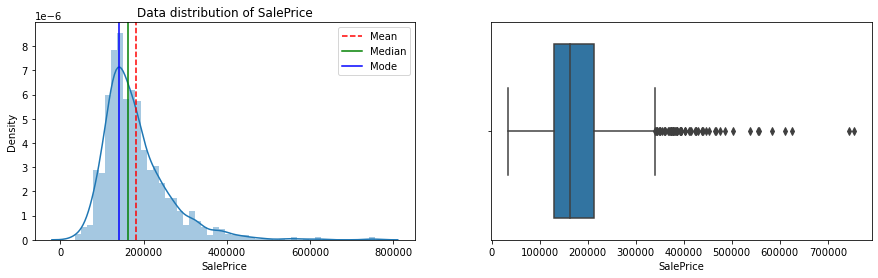

 Total Null values in GarageArea column: 0 out of 1460
Percentage of null values in GarageArea column is :0.0%


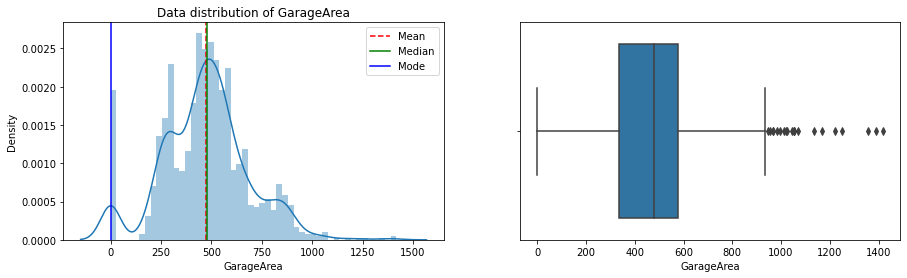

 Total Null values in GrLivArea column: 0 out of 1460
Percentage of null values in GrLivArea column is :0.0%


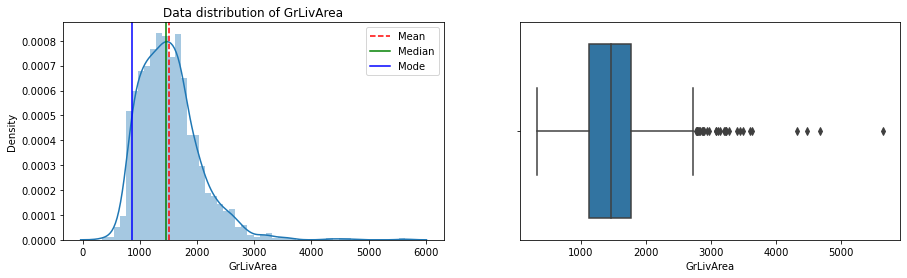

 Total Null values in TotalBsmtSF column: 0 out of 1460
Percentage of null values in TotalBsmtSF column is :0.0%


 Total Null values in LotArea column: 0 out of 1460
Percentage of null values in LotArea column is :0.0%


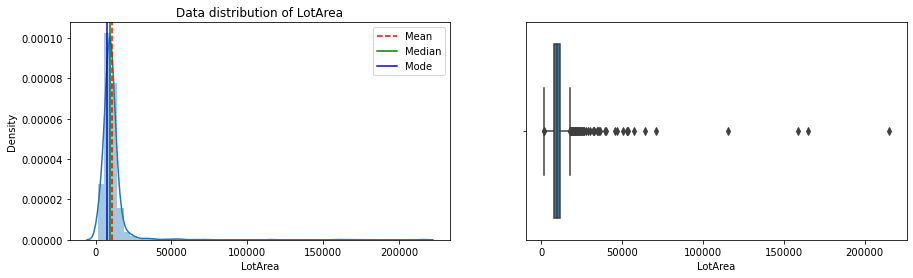

 Total Null values in LotFrontage column: 259 out of 1460
Percentage of null values in LotFrontage column is :17.74%


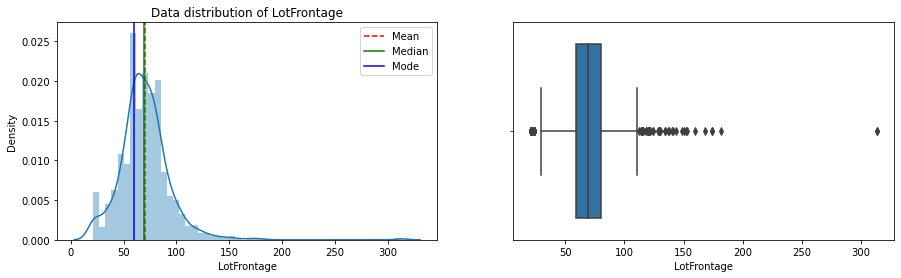

 Total Null values in YearBuilt column: 0 out of 1460
Percentage of null values in YearBuilt column is :0.0%


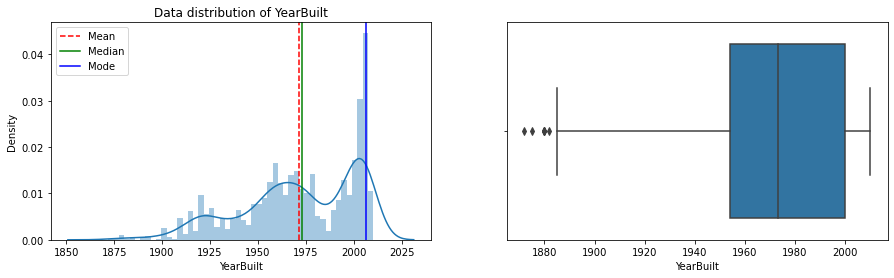

 Total Null values in YearRemodAdd column: 0 out of 1460
Percentage of null values in YearRemodAdd column is :0.0%


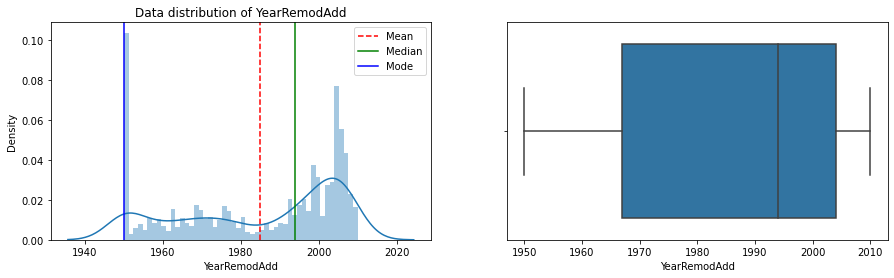

 Total Null values in MasVnrArea column: 8 out of 1460
Percentage of null values in MasVnrArea column is :0.55%


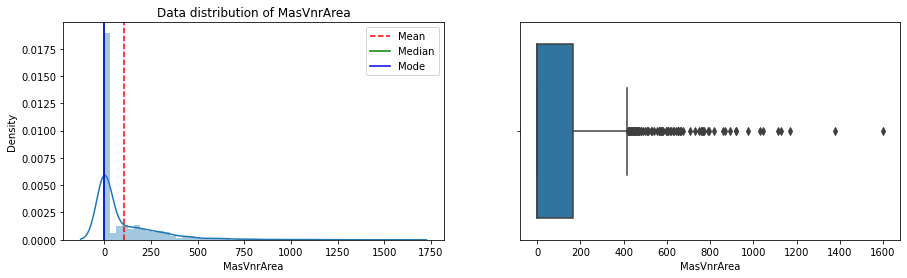

 Total Null values in BsmtFinSF1 column: 0 out of 1460
Percentage of null values in BsmtFinSF1 column is :0.0%


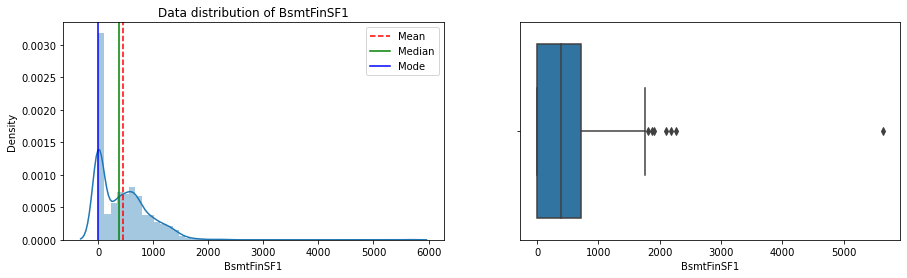

 Total Null values in BsmtFinSF2 column: 0 out of 1460
Percentage of null values in BsmtFinSF2 column is :0.0%


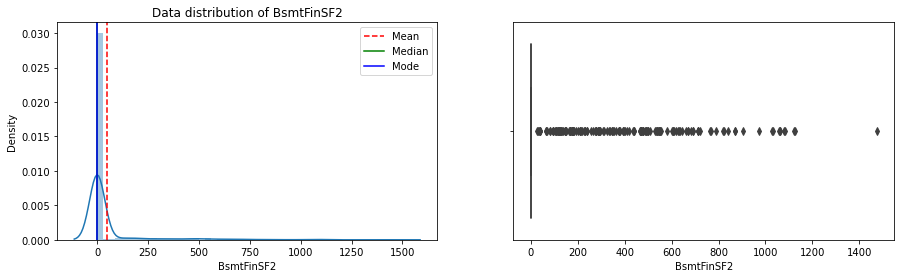

 Total Null values in BsmtUnfSF column: 0 out of 1460
Percentage of null values in BsmtUnfSF column is :0.0%


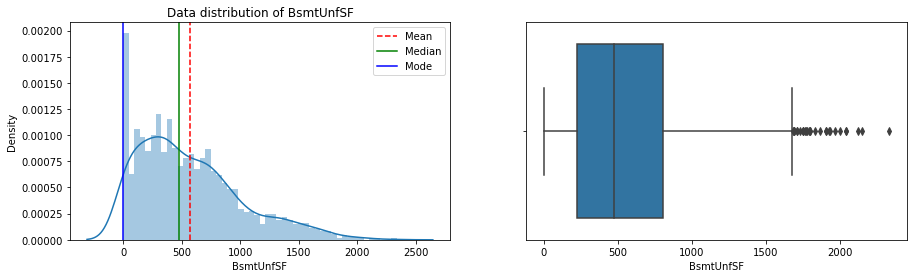

 Total Null values in 1stFlrSF column: 0 out of 1460
Percentage of null values in 1stFlrSF column is :0.0%


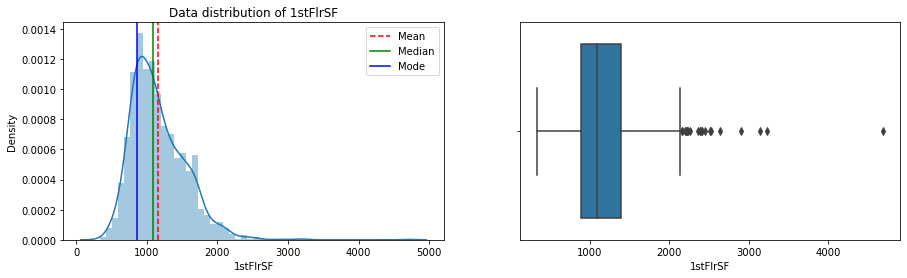

 Total Null values in 2ndFlrSF column: 0 out of 1460
Percentage of null values in 2ndFlrSF column is :0.0%


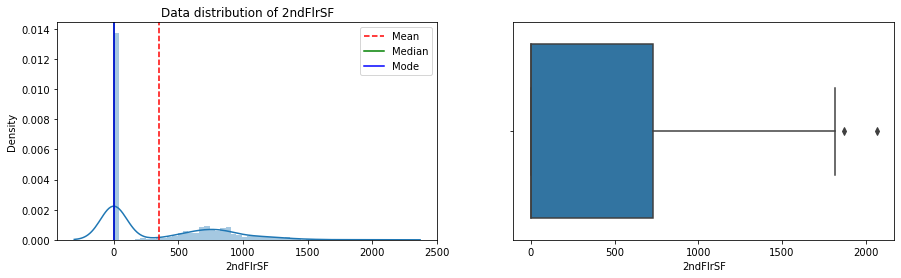

 Total Null values in WoodDeckSF column: 0 out of 1460
Percentage of null values in WoodDeckSF column is :0.0%


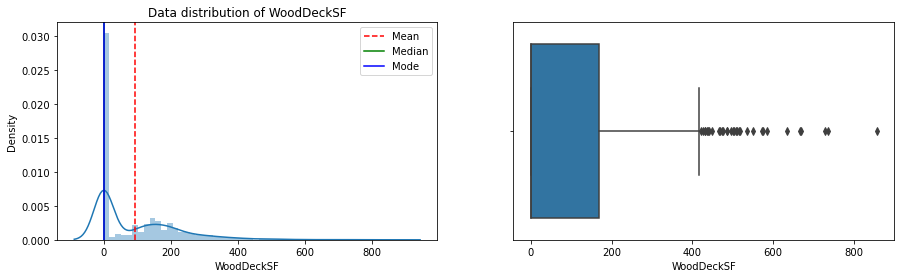

 Total Null values in OpenPorchSF column: 0 out of 1460
Percentage of null values in OpenPorchSF column is :0.0%


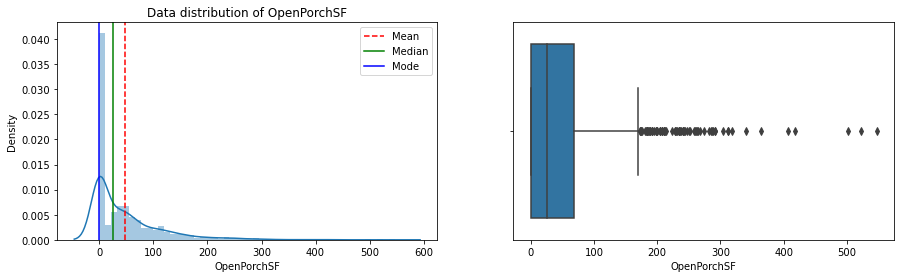

 Total Null values in EnclosedPorch column: 0 out of 1460
Percentage of null values in EnclosedPorch column is :0.0%


 Total Null values in 3SsnPorch column: 0 out of 1460
Percentage of null values in 3SsnPorch column is :0.0%


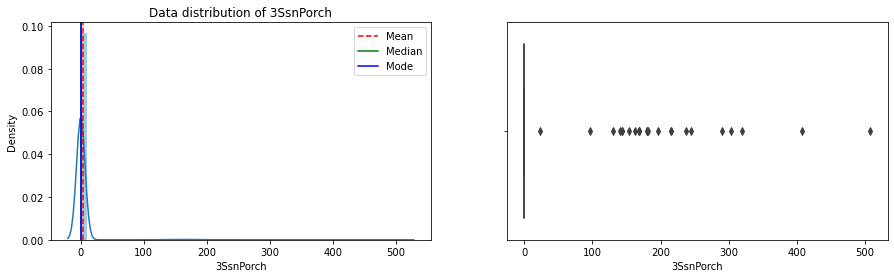

 Total Null values in ScreenPorch column: 0 out of 1460
Percentage of null values in ScreenPorch column is :0.0%


 Total Null values in PoolArea column: 0 out of 1460
Percentage of null values in PoolArea column is :0.0%


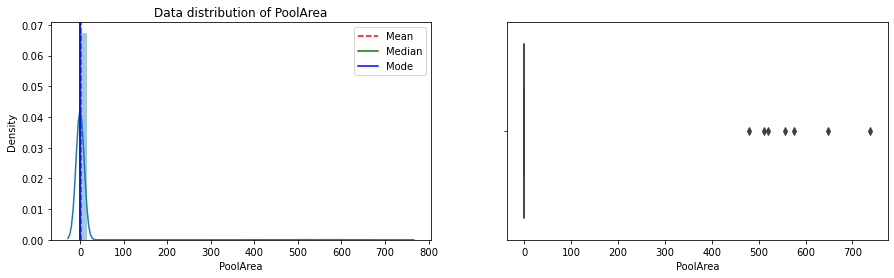

 Total Null values in LowQualFinSF column: 0 out of 1460
Percentage of null values in LowQualFinSF column is :0.0%


 Total Null values in MiscVal column: 0 out of 1460
Percentage of null values in MiscVal column is :0.0%


 Total Null values in GarageYrBlt column: 81 out of 1460
Percentage of null values in GarageYrBlt column is :5.55%


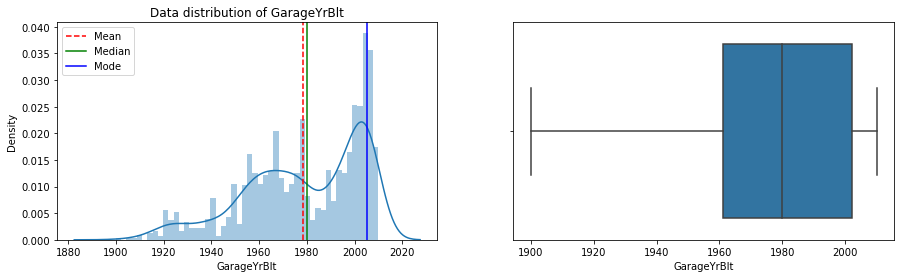

 Total Null values in Alley column: 1369 out of 1460
Percentage of null values in Alley column is :93.77%


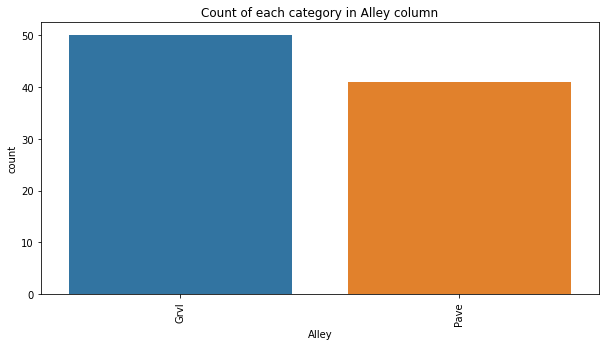

 Total Null values in Utilities column: 0 out of 1460
Percentage of null values in Utilities column is :0.0%


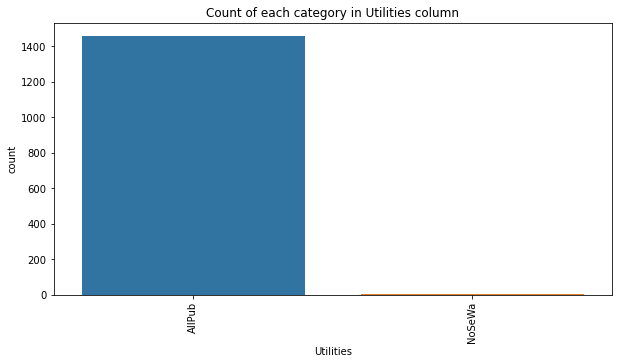

 Total Null values in MSSubClass column: 0 out of 1460
Percentage of null values in MSSubClass column is :0.0%


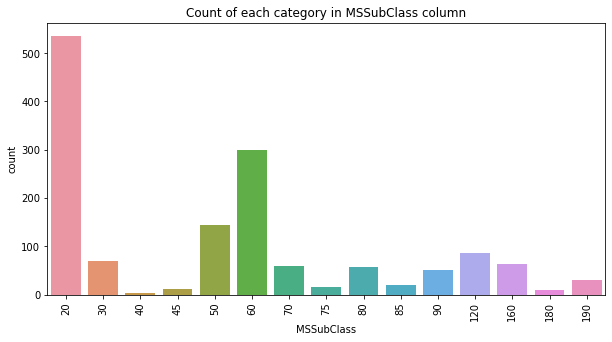

 Total Null values in MSZoning column: 0 out of 1460
Percentage of null values in MSZoning column is :0.0%


 Total Null values in MasVnrType column: 8 out of 1460
Percentage of null values in MasVnrType column is :0.55%


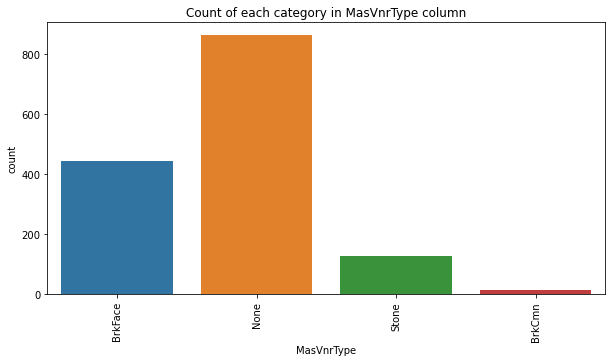

 Total Null values in Street column: 0 out of 1460
Percentage of null values in Street column is :0.0%


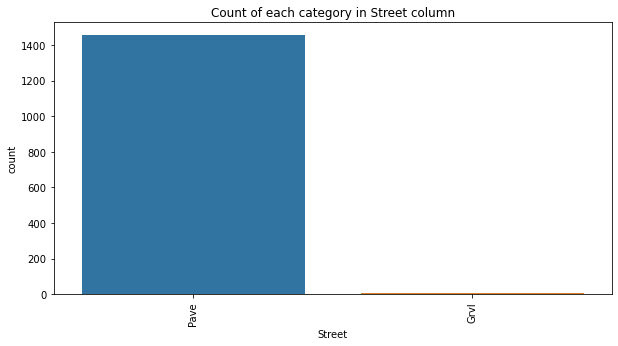

 Total Null values in LotShape column: 0 out of 1460
Percentage of null values in LotShape column is :0.0%


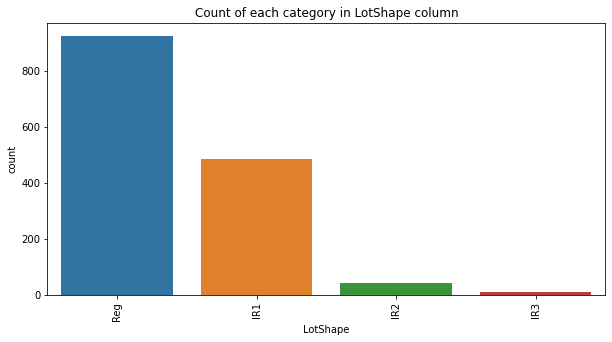

 Total Null values in LandContour column: 0 out of 1460
Percentage of null values in LandContour column is :0.0%


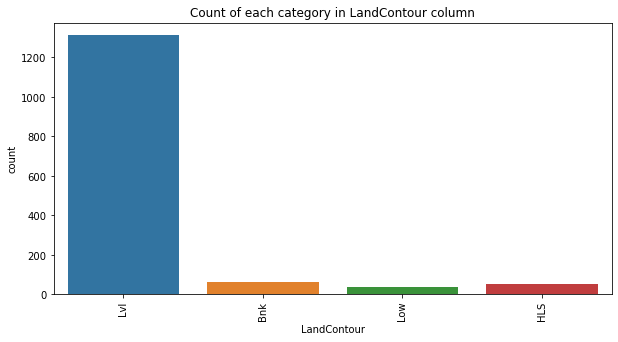

 Total Null values in LotConfig column: 0 out of 1460
Percentage of null values in LotConfig column is :0.0%


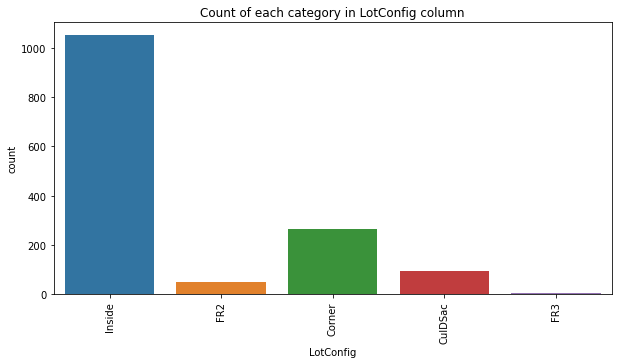

 Total Null values in LandSlope column: 0 out of 1460
Percentage of null values in LandSlope column is :0.0%


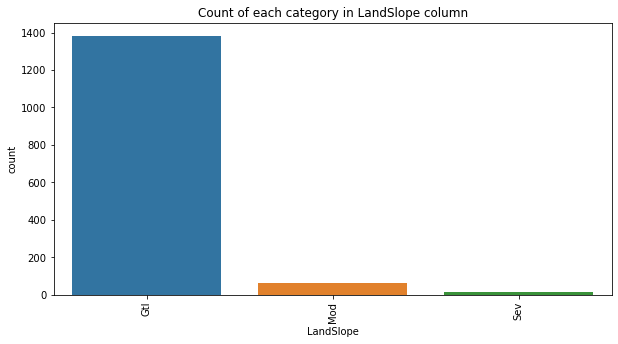

 Total Null values in Neighborhood column: 0 out of 1460
Percentage of null values in Neighborhood column is :0.0%


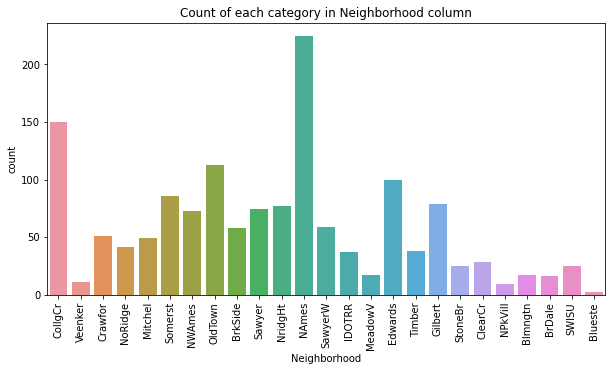

 Total Null values in Condition1 column: 0 out of 1460
Percentage of null values in Condition1 column is :0.0%


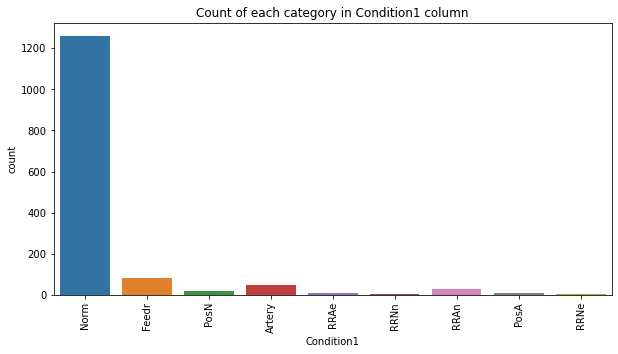

 Total Null values in Condition2 column: 0 out of 1460
Percentage of null values in Condition2 column is :0.0%


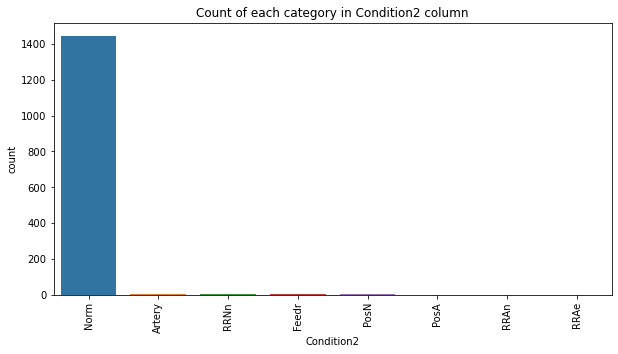

 Total Null values in BldgType column: 0 out of 1460
Percentage of null values in BldgType column is :0.0%


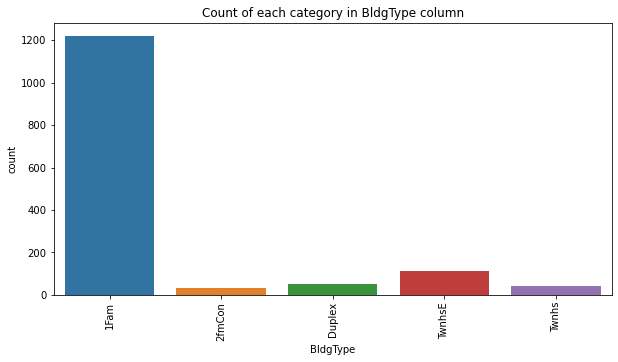

 Total Null values in HouseStyle column: 0 out of 1460
Percentage of null values in HouseStyle column is :0.0%


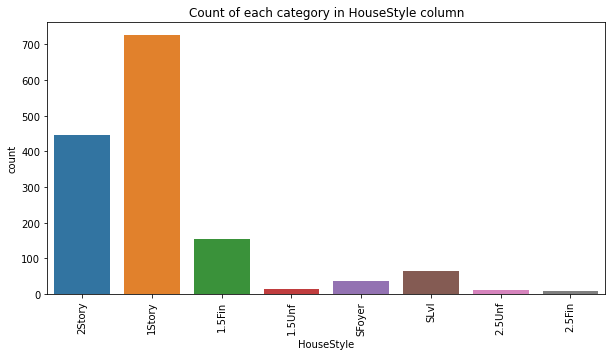

 Total Null values in OverallQual column: 0 out of 1460
Percentage of null values in OverallQual column is :0.0%


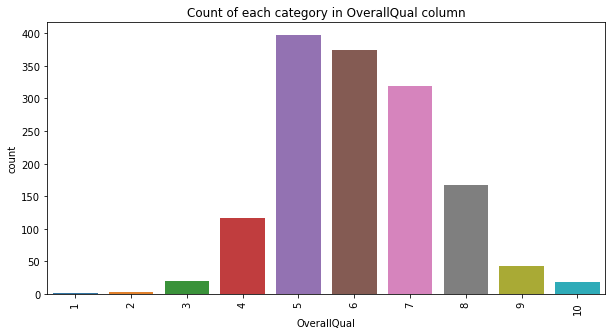

 Total Null values in OverallCond column: 0 out of 1460
Percentage of null values in OverallCond column is :0.0%


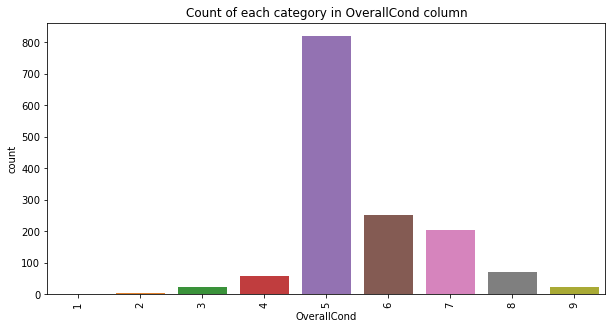

 Total Null values in RoofStyle column: 0 out of 1460
Percentage of null values in RoofStyle column is :0.0%


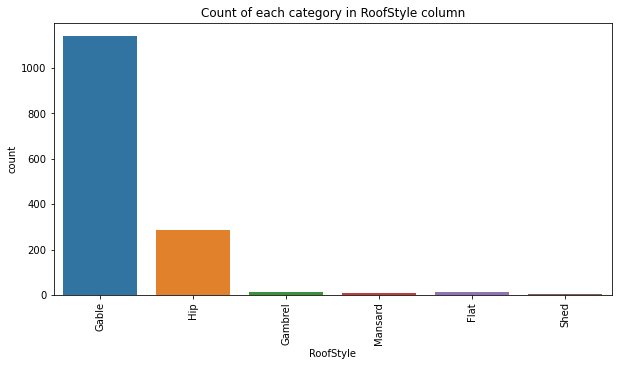

 Total Null values in RoofMatl column: 0 out of 1460
Percentage of null values in RoofMatl column is :0.0%


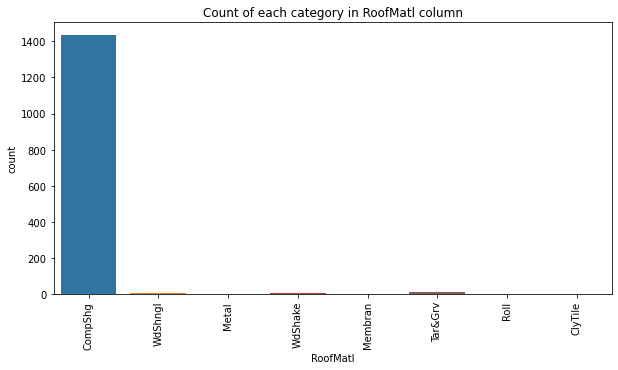

 Total Null values in Exterior1st column: 0 out of 1460
Percentage of null values in Exterior1st column is :0.0%


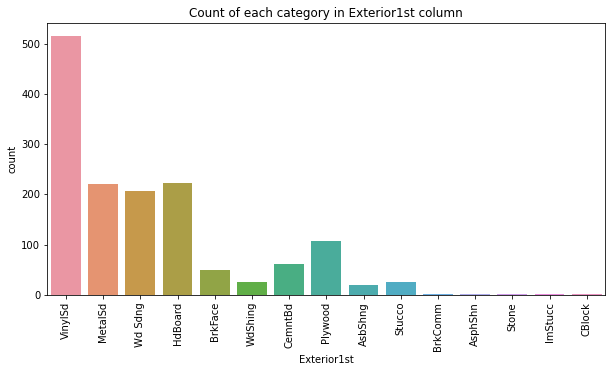

 Total Null values in Exterior2nd column: 0 out of 1460
Percentage of null values in Exterior2nd column is :0.0%


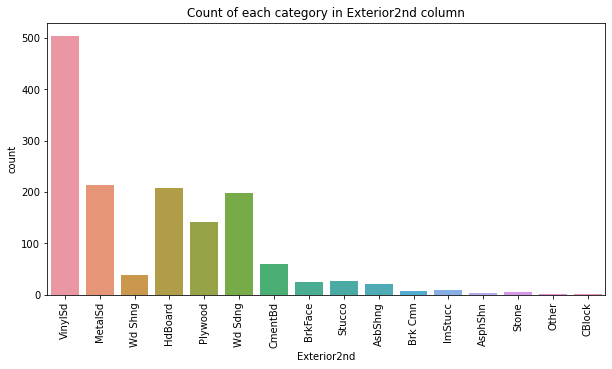

 Total Null values in ExterQual column: 0 out of 1460
Percentage of null values in ExterQual column is :0.0%


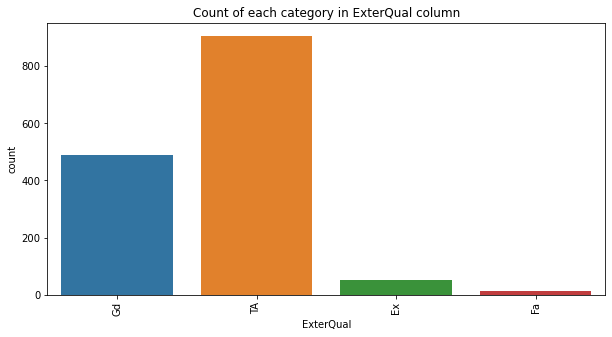

 Total Null values in ExterCond column: 0 out of 1460
Percentage of null values in ExterCond column is :0.0%


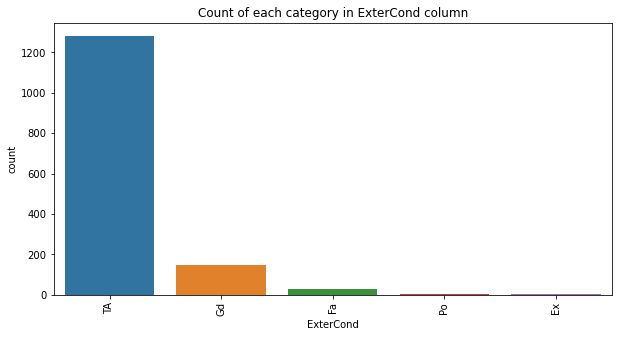

 Total Null values in Foundation column: 0 out of 1460
Percentage of null values in Foundation column is :0.0%


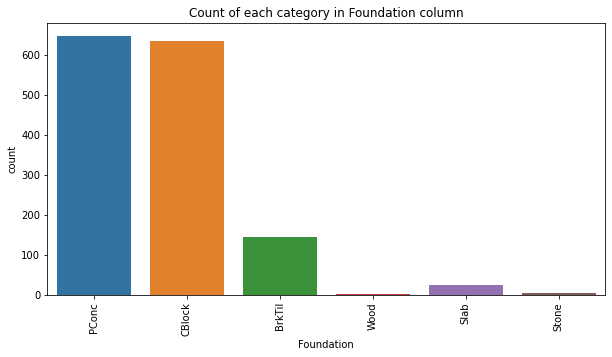

 Total Null values in BsmtQual column: 37 out of 1460
Percentage of null values in BsmtQual column is :2.53%


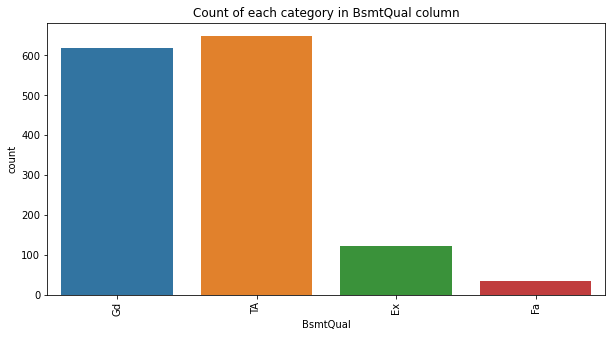

 Total Null values in BsmtCond column: 37 out of 1460
Percentage of null values in BsmtCond column is :2.53%


 Total Null values in BsmtExposure column: 38 out of 1460
Percentage of null values in BsmtExposure column is :2.6%


 Total Null values in BsmtFinType1 column: 37 out of 1460
Percentage of null values in BsmtFinType1 column is :2.53%


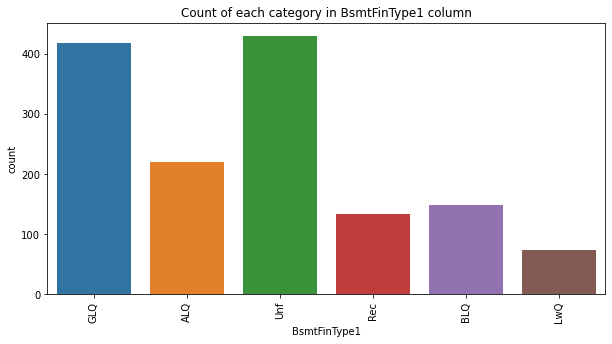

 Total Null values in BsmtFinType2 column: 38 out of 1460
Percentage of null values in BsmtFinType2 column is :2.6%


 Total Null values in Electrical column: 1 out of 1460
Percentage of null values in Electrical column is :0.07%


 Total Null values in Heating column: 0 out of 1460
Percentage of null values in Heating column is :0.0%


 Total Null values in CentralAir column: 0 out of 1460
Percentage of null values in CentralAir column is :0.0%


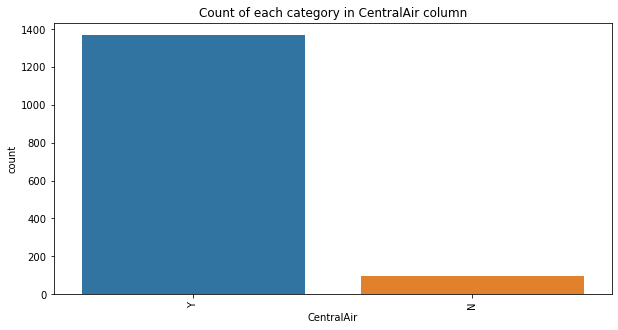

 Total Null values in HeatingQC column: 0 out of 1460
Percentage of null values in HeatingQC column is :0.0%


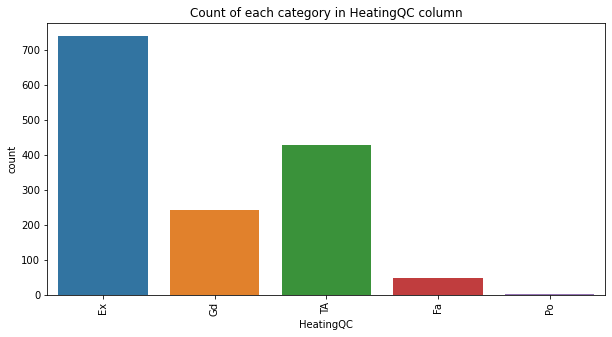

 Total Null values in BsmtHalfBath column: 0 out of 1460
Percentage of null values in BsmtHalfBath column is :0.0%


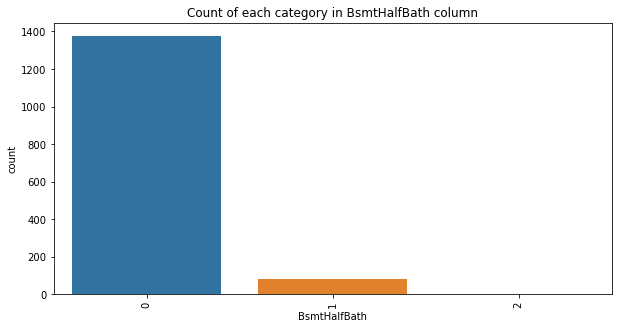

 Total Null values in BsmtFullBath column: 0 out of 1460
Percentage of null values in BsmtFullBath column is :0.0%


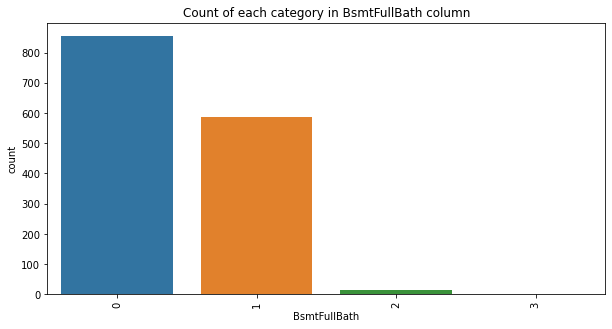

 Total Null values in FullBath column: 0 out of 1460
Percentage of null values in FullBath column is :0.0%


 Total Null values in HalfBath column: 0 out of 1460
Percentage of null values in HalfBath column is :0.0%


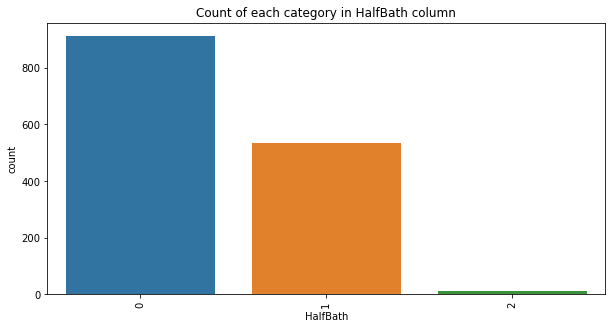

 Total Null values in BedroomAbvGr column: 0 out of 1460
Percentage of null values in BedroomAbvGr column is :0.0%


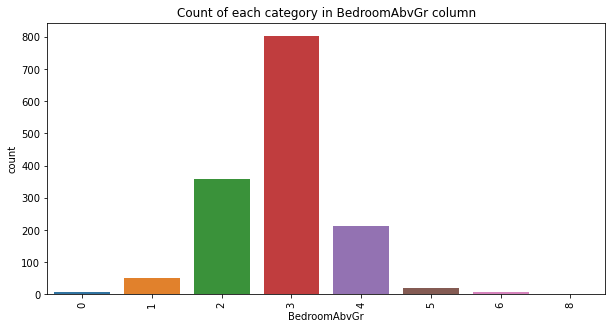

 Total Null values in KitchenAbvGr column: 0 out of 1460
Percentage of null values in KitchenAbvGr column is :0.0%


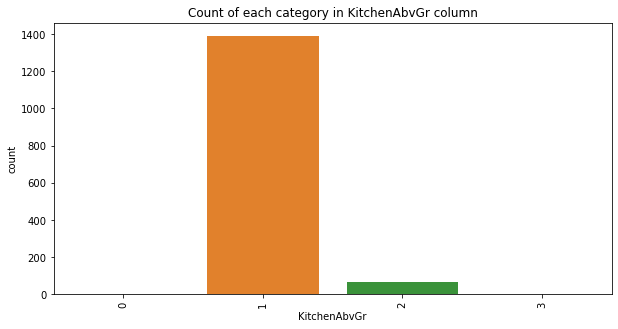

 Total Null values in Functional column: 0 out of 1460
Percentage of null values in Functional column is :0.0%


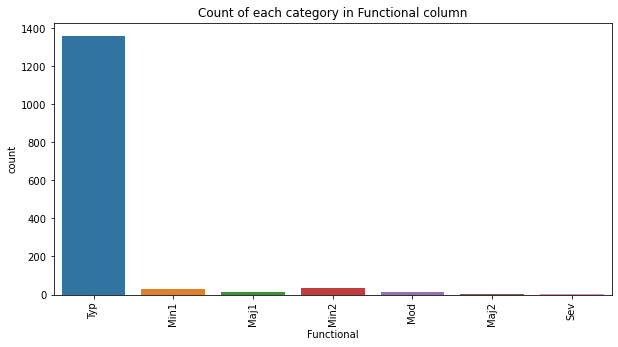

 Total Null values in KitchenQual column: 0 out of 1460
Percentage of null values in KitchenQual column is :0.0%


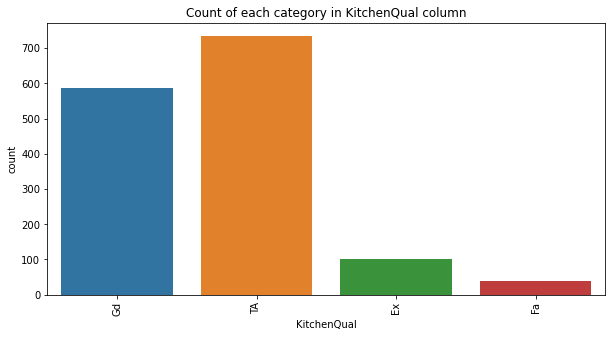

 Total Null values in TotRmsAbvGrd column: 0 out of 1460
Percentage of null values in TotRmsAbvGrd column is :0.0%


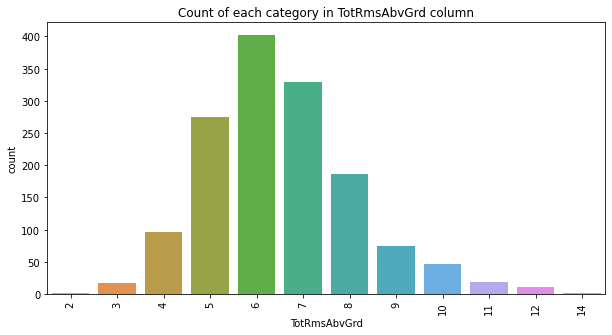

 Total Null values in Fireplaces column: 0 out of 1460
Percentage of null values in Fireplaces column is :0.0%


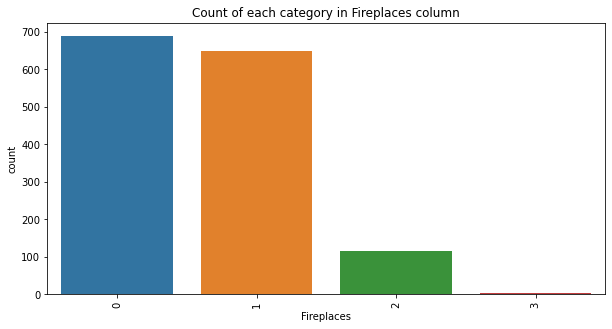

 Total Null values in FireplaceQu column: 690 out of 1460
Percentage of null values in FireplaceQu column is :47.26%


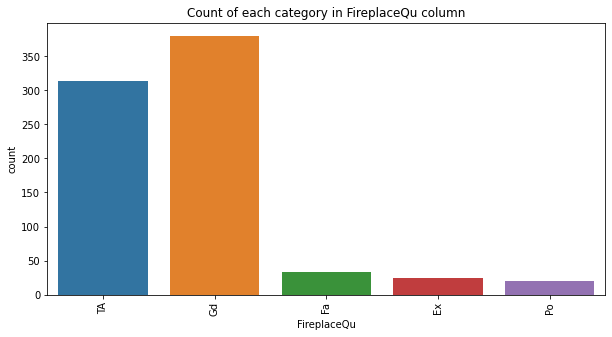

 Total Null values in GarageType column: 81 out of 1460
Percentage of null values in GarageType column is :5.55%


 Total Null values in GarageQual column: 81 out of 1460
Percentage of null values in GarageQual column is :5.55%


 Total Null values in GarageCond column: 81 out of 1460
Percentage of null values in GarageCond column is :5.55%


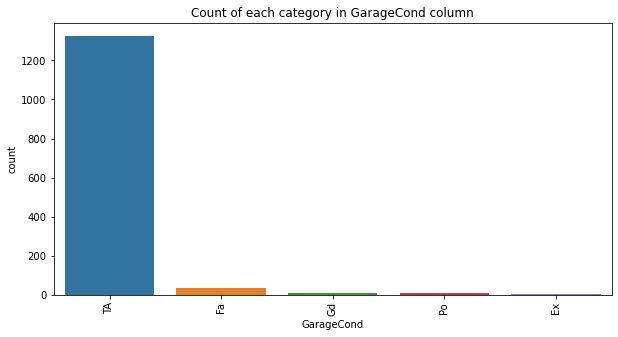

 Total Null values in PavedDrive column: 0 out of 1460
Percentage of null values in PavedDrive column is :0.0%


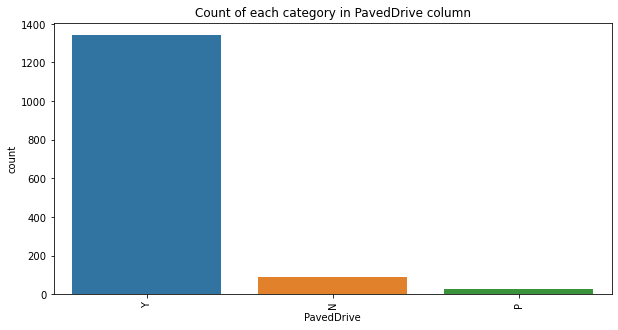

 Total Null values in PoolQC column: 1453 out of 1460
Percentage of null values in PoolQC column is :99.52%


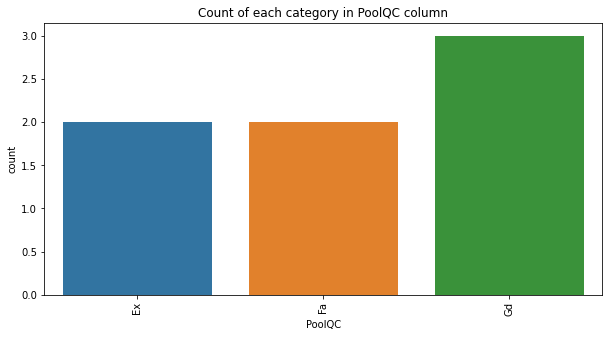

 Total Null values in Fence column: 1179 out of 1460
Percentage of null values in Fence column is :80.75%


 Total Null values in MiscFeature column: 1406 out of 1460
Percentage of null values in MiscFeature column is :96.3%


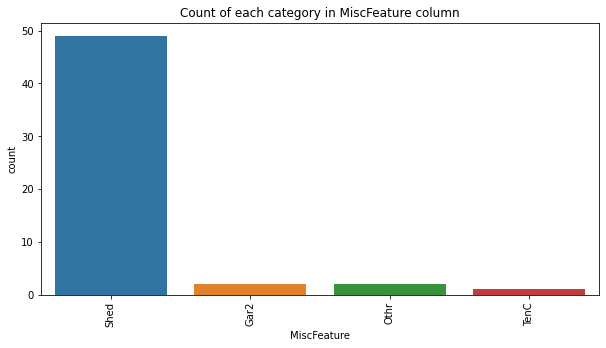

 Total Null values in GarageFinish column: 81 out of 1460
Percentage of null values in GarageFinish column is :5.55%


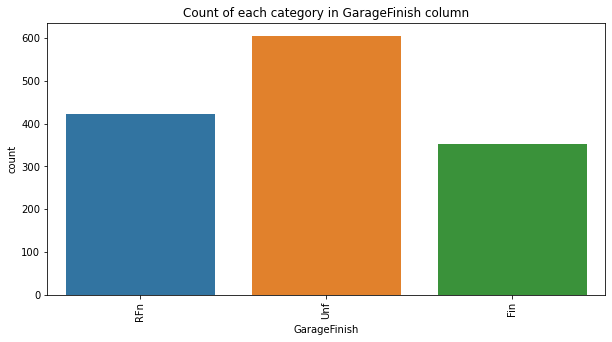

 Total Null values in GarageCars column: 0 out of 1460
Percentage of null values in GarageCars column is :0.0%


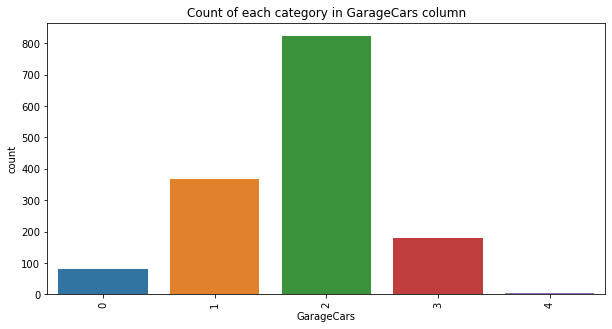

 Total Null values in MoSold column: 0 out of 1460
Percentage of null values in MoSold column is :0.0%


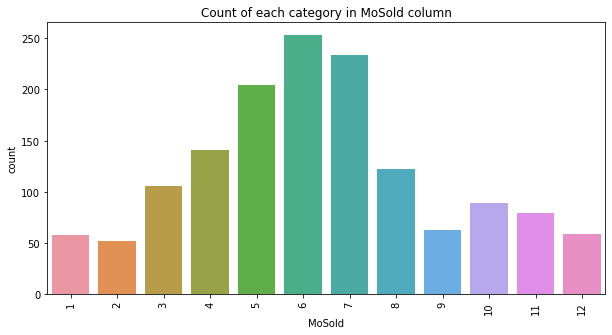

 Total Null values in YrSold column: 0 out of 1460
Percentage of null values in YrSold column is :0.0%


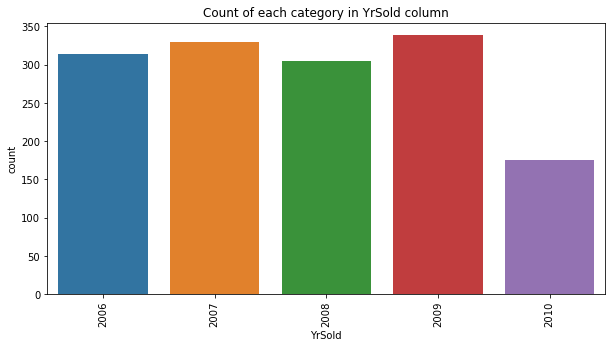

 Total Null values in SaleType column: 0 out of 1460
Percentage of null values in SaleType column is :0.0%


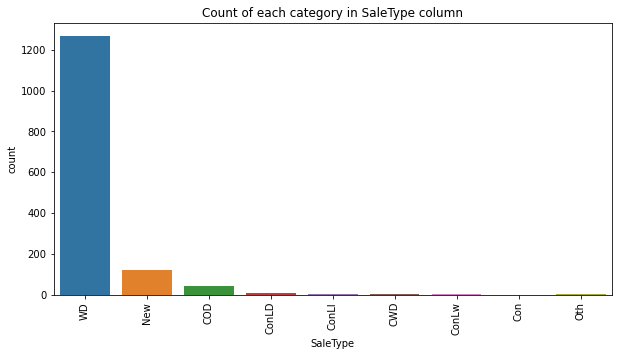

 Total Null values in SaleCondition column: 0 out of 1460
Percentage of null values in SaleCondition column is :0.0%


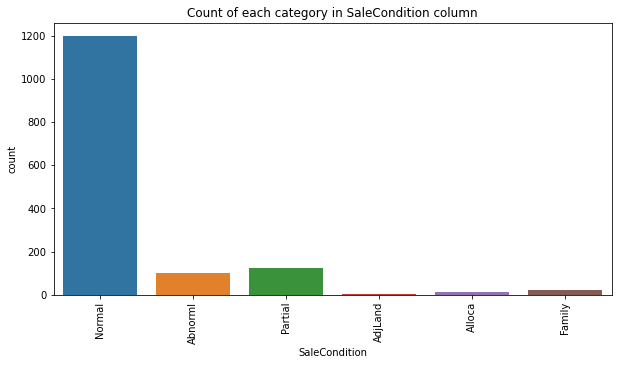

In [5]:
# Finding null values in Continious Feature variables
numericFeatures = [
    "SalePrice", 
    "GarageArea", 
    "GrLivArea", 
    "TotalBsmtSF", 
    "LotArea", 
    "LotFrontage",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    'BsmtUnfSF',
    '1stFlrSF',
    '2ndFlrSF',
    'WoodDeckSF', 
    'OpenPorchSF', 
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'LowQualFinSF',
    'MiscVal',
    "GarageYrBlt"
]

categoricalFeatures = [
    "Alley", 
    "Utilities", 
    "MSSubClass", 
    "MSZoning", 
    "MasVnrType", 
    "Street", 
    "LotShape", 
    "LandContour",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    'Condition1', 
    'Condition2',
    "BldgType",
    "HouseStyle",
    "OverallQual",
    'OverallCond',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st', 
    'Exterior2nd',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'Electrical',
    'Heating', 
    'CentralAir',
    'HeatingQC',
    'BsmtHalfBath',
    "BsmtFullBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    'KitchenAbvGr',
    'Functional',
    "KitchenQual",
    "TotRmsAbvGrd",
    "Fireplaces",
    "FireplaceQu",
    "GarageType",
    'GarageQual', 
    'GarageCond', 
    'PavedDrive',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'GarageFinish',
    'GarageCars',
    'MoSold',
    'YrSold',
    'SaleType',
    'SaleCondition'
]

for nf in numericFeatures:
    nulls(nf)
    plotDist(nf)
    
for cf in categoricalFeatures:
    nulls(cf)
    countPlot(cf)

In [6]:
# LotFrontage has a lot of outliers and biased thats why dropping
# Alley 
# Utilities, MSSubClass, Street, KitchenAbvGr, Functional, MiscVal, SaleType, SaleCondition is highly biased so dropping

# BsmtUnfSF is having outliers and is biased as well toward 0. To resolve outlier probelm we need to remove some record 
# which can remove some significant variables. So dropping this variable

# LowQualFinSF is highly biased so dropping this feature
# BsmtHalfBath is also highly biased so dropping this feature
sales.drop([
    "Id",
    'LotFrontage',
    'Alley',
    'Utilities',
    'MSSubClass',
    'Street',
    'LandContour',
    'LandSlope',
    'Condition1', 
    'Condition2',
    'BldgType',
    'RoofMatl',
    'Exterior1st', 
    'Exterior2nd',
    'MasVnrArea',
    'ExterCond',
    'BsmtCond',
    'BsmtFinSF1',
    'BsmtFinType2',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'Electrical',
    'Heating', 
    'CentralAir',
    '2ndFlrSF',
    'LowQualFinSF',
    'BsmtHalfBath',
    'KitchenAbvGr',
    'Functional',
    'GarageQual', 
    'GarageCond', 
    'PavedDrive', 
    'WoodDeckSF', 
    'OpenPorchSF', 
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'PoolQC',
    'Fence',
    'MiscFeature',
    "MiscVal",
    'SaleType',
    'SaleCondition'
], axis=1, inplace=True)

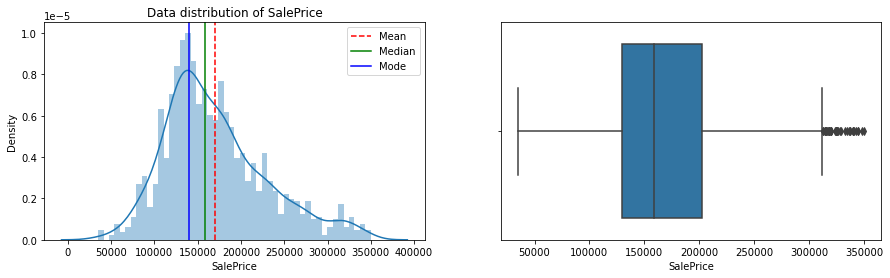

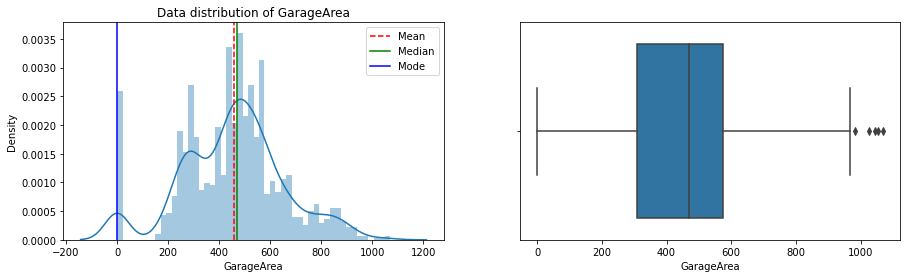

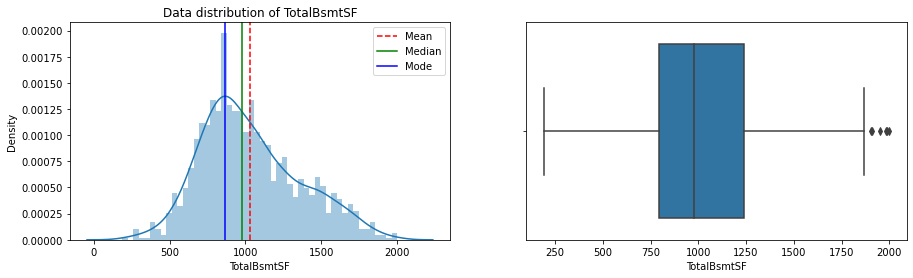

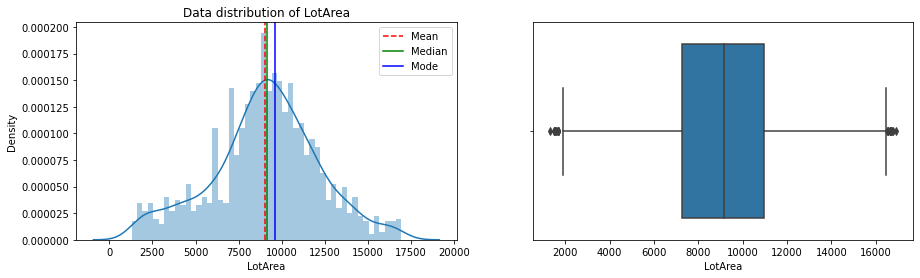

In [7]:
selectedNumericFeatures = ["SalePrice", "GarageArea", "GrLivArea", "TotalBsmtSF", "LotArea"]

# Treating outliers for few features
sales = sales[sales.SalePrice <= 350000]
sales = sales[sales.GarageArea <= 1200]
sales = sales[sales.GrLivArea <= 2800]
sales = sales[(sales.TotalBsmtSF <= 2000) & (sales.TotalBsmtSF >= 150)]
sales = sales[sales.LotArea <= 17000]

for nc in selectedNumericFeatures:
    plotDist(nc)

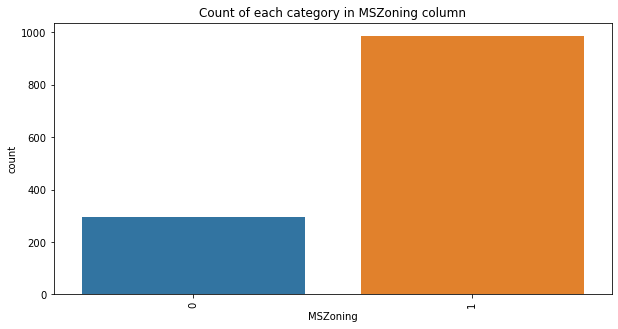

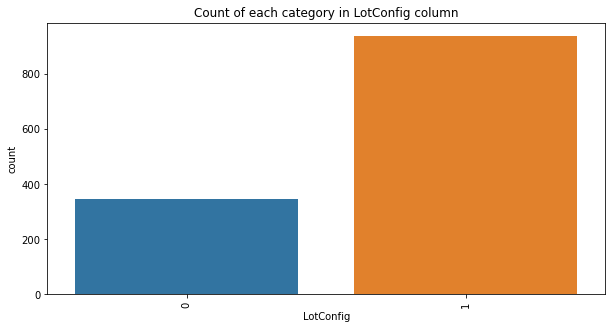

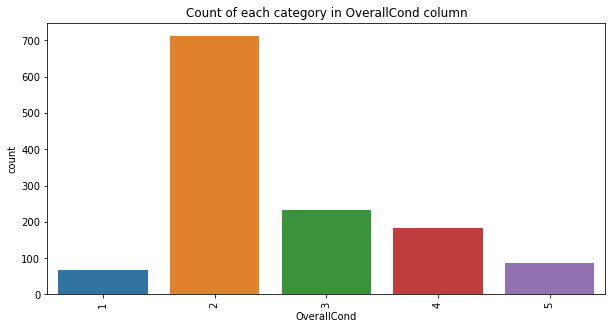

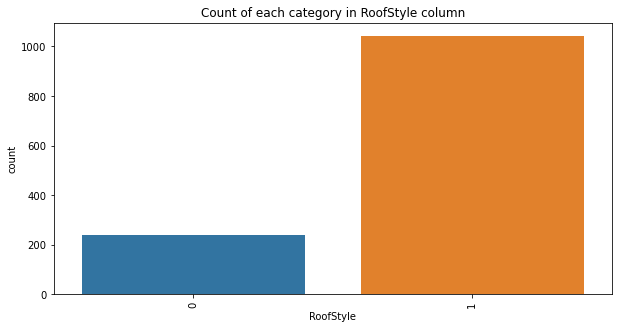

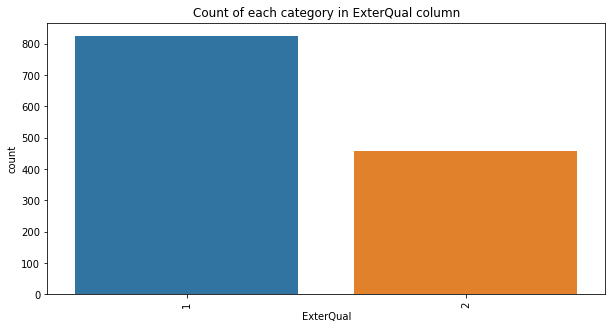

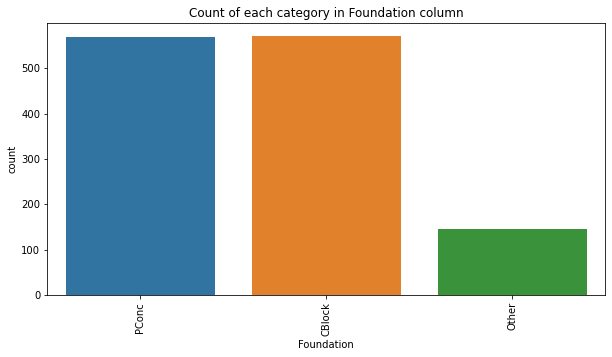

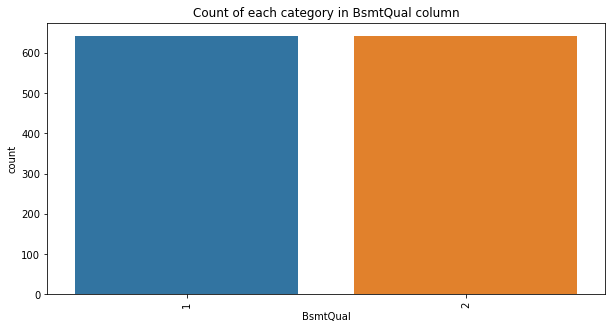

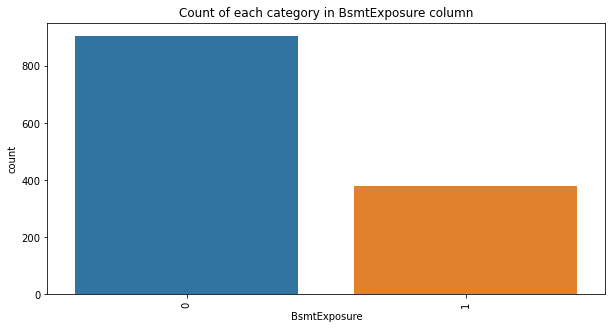

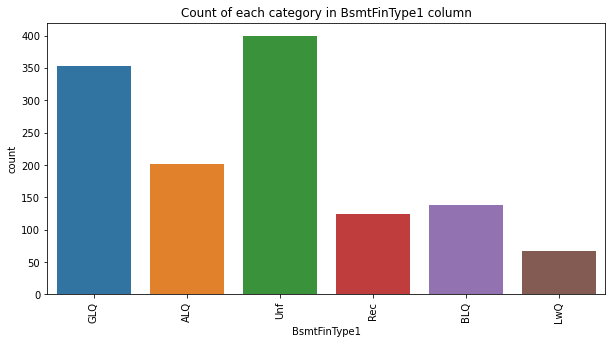

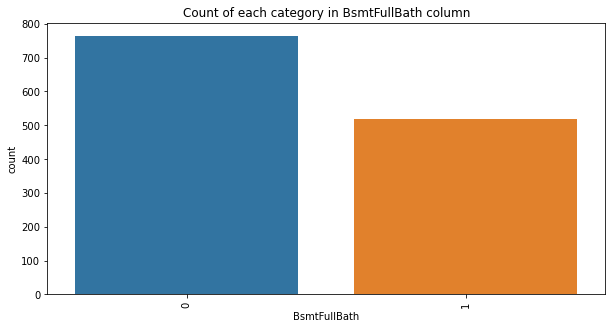

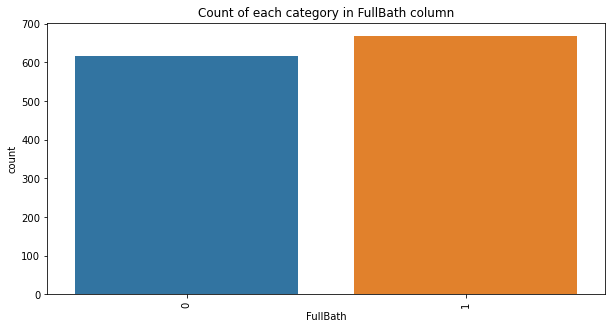

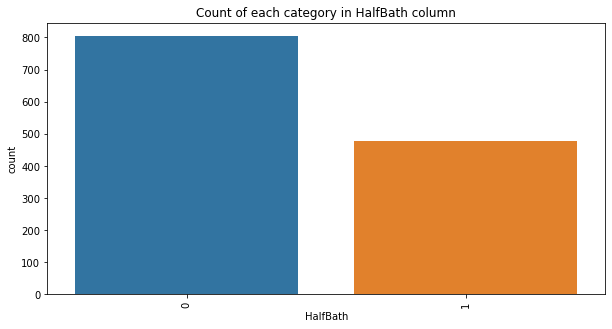

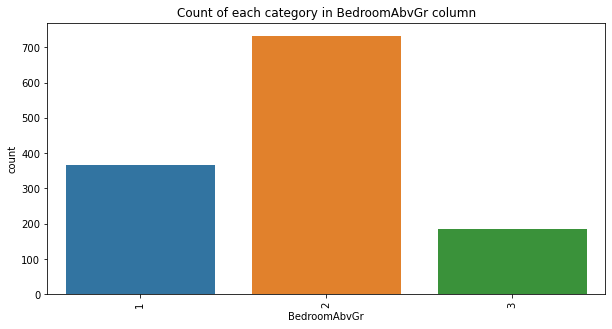

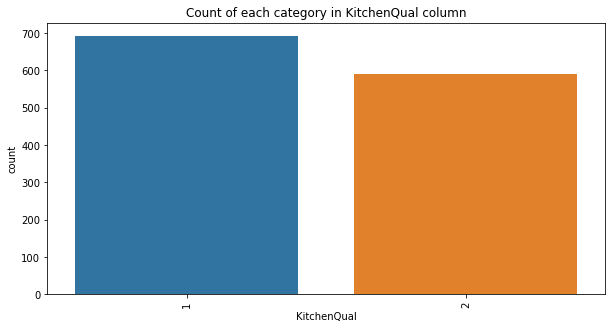

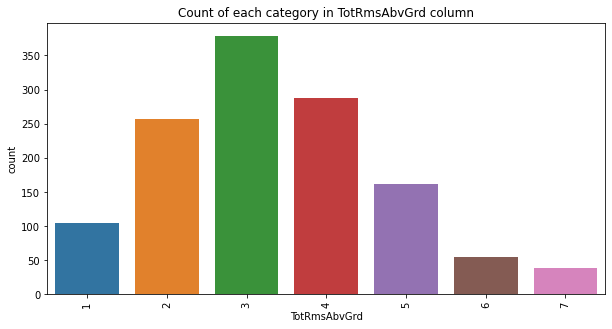

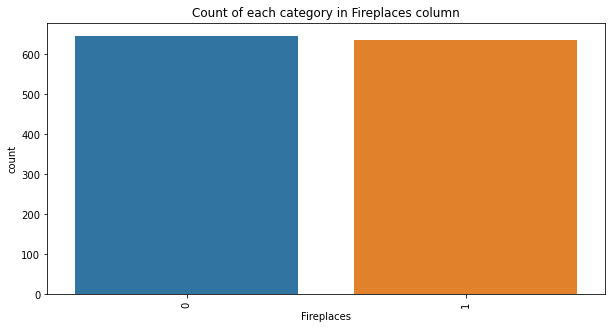

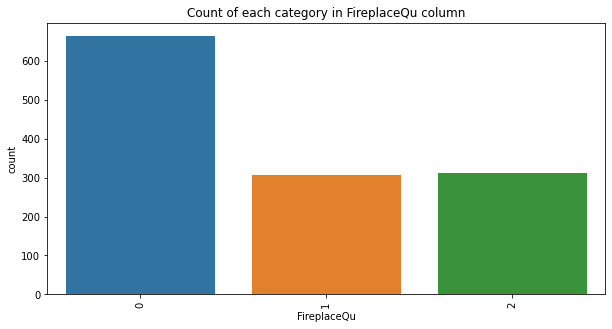

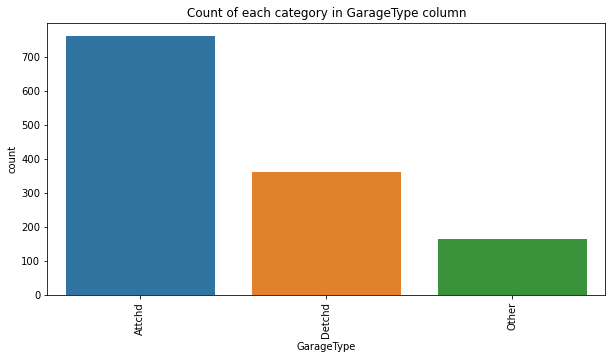

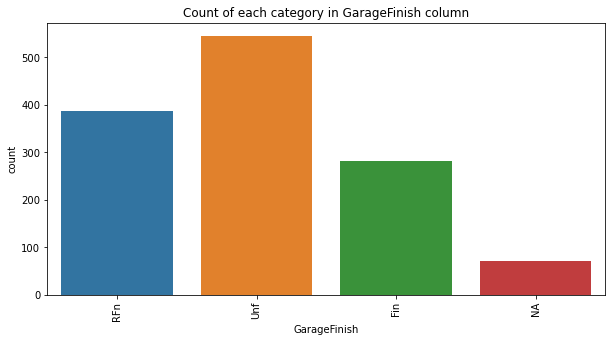

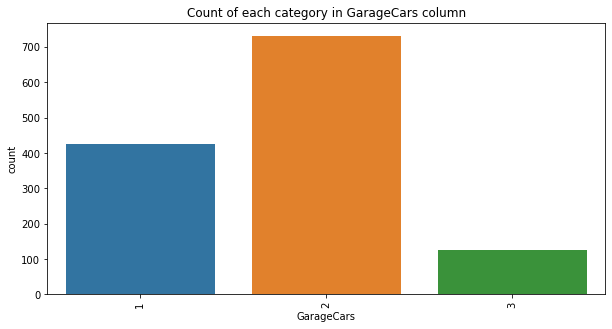

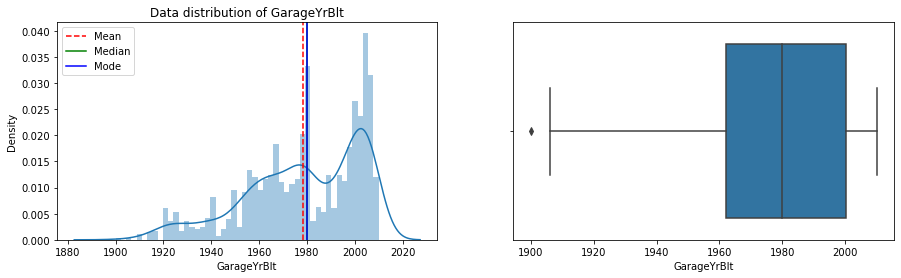

In [8]:
treatedCategoricalFeatures = [
    "MSZoning", 
    "MasVnrType", 
    "LotShape", 
    "LotConfig", 
    "HouseStyle", 
    "OverallQual", 
    "OverallCond",
    "RoofStyle",
    "ExterQual",
    "Foundation",
    "BsmtQual",
    "BsmtExposure",
    "BsmtFinType1",
    "HeatingQC",
    "BsmtFullBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenQual",
    "TotRmsAbvGrd",
    "Fireplaces",
    "FireplaceQu",
    "GarageType",
    'GarageFinish',
    'GarageCars'
]

# Converting "RM", "C (all)", "FV", "RH" categories to "Other"
sales.MSZoning = sales.MSZoning.apply(lambda x: 1 if x == "RL" else 0)

# replacing null values with mode
sales.MasVnrType.fillna("None", inplace=True)
# replacing "BrkFace" and "BrkCmn" with "Brk"
sales.MasVnrType = sales.MasVnrType.apply(lambda x: "Brk" if x.startswith("Brk") else x)

# Converting all other categories to "Other"
sales.LotShape = sales.LotShape.apply(lambda x: 1 if x == "Reg" else 0)

# LotConfig data is highly biased toward "Inside". replacing all other to "other" category
sales.LotConfig = sales.LotConfig.apply(lambda x: 1 if x == "Inside" else 0)

# HouseStyle is also a biased feature. Replacing all the categories "1.5Unf", "SFoyer", "SLvl", "2.5Unf", "2.5Fin" and "2Strory" to "MoreThan1Story"
sales.HouseStyle = sales.HouseStyle.apply(lambda x: 1 if x == "1Story" else 2)

# OverallQual is a Ordinal feature. But it is unbalanced in the Ordinal categories. So converting as per below rule:-
# 1,2,3,4 --> 1
# 5 --> 2
# 6 --> 3
# 7 --> 4
# 8,9,10 --> 5
# So converting 1-10 scale into 1-5 scale to make it more balanced
sales.OverallQual = sales.OverallQual.map({1:1,2:1,3:1,4:1,5:2,6:3,7:4,8:5,9:5,10:5})

# OverallCond is a Ordinal feature. But it is unbalanced in the Ordinal categories. So converting as per below rule:-
# 1,2,3,4 --> 1
# 5 --> 2
# 6 --> 3
# 7 --> 4
# 8,9,10 --> 5
# So converting 1-10 scale into 1-5 scale to make it more balanced
sales.OverallCond = sales.OverallCond.map({1:1,2:1,3:1,4:1,5:2,6:3,7:4,8:5,9:5,10:5})

# RoofStyle is having biased data. So converting all negligible categories into "Other"
sales.RoofStyle = sales.RoofStyle.apply(lambda x: 1 if x == "Gable" else 0)

# ExterQual is a biased column and having Ordinal data
# Need to rebalance it and convert it to numbers
# Excellent (Ex), Good(Gd) --> 2
# Average/Typical (TA), Fair (Fa) --> 1
sales.ExterQual = sales.ExterQual.map({"Gd":2,"Ex":2,"TA":1,"Fa":1})

# Foundation is biased data need to convert all the minor categories to "Other"
sales.Foundation = sales.Foundation.apply(lambda x: x if x=="PConc" or x == "CBlock" else "Other")

# 36 null values are actually representing "NA"
sales.BsmtQual.fillna("NA", inplace=True)
# BsmtQual is a biased column and having Ordinal data
# Need to rebalance it and convert it to numbers
# Excellent (Ex), Good(Gd) --> 2
# Average/Typical (TA), Fair (Fa) --> 1
sales.BsmtQual = sales.BsmtQual.map({"Gd":2,"Ex":2,"TA":1,"Fa":1,"NA":0})

# Here 37 null values shows "NA" so replacing
sales.BsmtExposure.fillna("NA",inplace=True)
# Data is baised so making it unbiased by combining few categories
# "Gd", "Mn", "Av" --> 1
# "No", "NA" --> 0
sales.BsmtExposure = sales.BsmtExposure.map({"No":0,"NA":0,"Gd":1,"Av":1,"Mn":1})

# 36 null values is for "NA" entry
sales.BsmtFinType1.fillna("NA",inplace=True)


# HeatingQC is a ordinal variable and has biased categories so converting:-
# Poor (Po), Fair (Fa), Average/Typical (TA) --> 1
# Good (Gd) --> 2
# Excellent (Ex) --> 3
sales.HeatingQC = sales.HeatingQC.map({"Po":1,"Fa":1,"TA":1,'Gd':2,'Ex':3})


# BsmtFullBath is ordinal feature and biased changing the categoriesas per:-
# 0 --> 0
# 1,2,3 --> 1
sales.BsmtFullBath = sales.BsmtFullBath.map({0:0,1:1,2:1,3:1})

# FullBath is ordinal feature and biased changing the categoriesas per:-
# 0, 1 --> 0
# 2,3 --> 1
sales.FullBath = sales.FullBath.map({0:0,1:0,2:1,3:1})

# HalfBath is ordinal feature and biased changing the categoriesas per:-
# 0, --> 0
# 1,2 --> 1
sales.HalfBath = sales.HalfBath.map({0:0,1:1,2:1})

# BedroomAbvGr is ordinal feature and biased changing the categoriesas per:-
# 0,1,2 --> 1
# 3 --> 2
# 4,5,6 --> 3
sales.BedroomAbvGr = sales.BedroomAbvGr.map({0:1,1:1,2:1, 3:2,4:3,5:3,6:3})

# KitchenQual is ordinal variable and biased so converting:-
sales.KitchenQual = sales.KitchenQual.map({"Gd":2,"Ex":2,"TA":1,"Fa":1})

# TotRmsAbvGrd is ordinal variable and biased so converting:-
sales.TotRmsAbvGrd = sales.TotRmsAbvGrd.map({3:1,4:1,5:2,6:3,7:4,8:5,9:6,10:7,11:7,12:7})

# Fireplaces is ordinal variable and biased so converting:-
sales.Fireplaces = sales.Fireplaces.map({0:0,1:1,2:1,3:1})

# FireplaceQu has 611 null values which are actually equal to "NA"
sales.FireplaceQu.fillna("NA", inplace=True)
# FireplaceQu is ordinal variable and biased so converting:-
sales.FireplaceQu = sales.FireplaceQu.map({"Gd":2,"Ex":2,"TA":1,"Fa":1,"Po":0, "NA":0})

# GarageType has 65 null values which are actually equal to "NA"
sales.GarageType.fillna("NA", inplace=True)
# GarageType is ordinal variable and biased so converting:-
sales.GarageType = sales.GarageType.apply(lambda x: x if x =="Attchd" or x == "Detchd" else "Other")

# GarageFinish has 65 null values which is actually "NA"
sales.GarageFinish.fillna("NA", inplace=True)

# GarageCars is biased and needs to balance it:-
# 0,1 --> 1
# 2-->2
# 3,4 --> 3
sales.GarageCars = sales.GarageCars.map({0:1,1:1,2:2,3:3,4:3})

# GarageYrBlt "null" values imputing with median value
sales.GarageYrBlt.fillna(sales.GarageYrBlt.median(), inplace=True)


for cf in treatedCategoricalFeatures:
    countPlot(cf)
    
plotDist("GarageYrBlt")

In [9]:
# Remaining features after cleaning and sanitization
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1284 non-null   int64  
 1   LotArea       1284 non-null   int64  
 2   LotShape      1284 non-null   int64  
 3   LotConfig     1284 non-null   int64  
 4   Neighborhood  1284 non-null   object 
 5   HouseStyle    1284 non-null   int64  
 6   OverallQual   1284 non-null   int64  
 7   OverallCond   1284 non-null   int64  
 8   YearBuilt     1284 non-null   int64  
 9   YearRemodAdd  1284 non-null   int64  
 10  RoofStyle     1284 non-null   int64  
 11  MasVnrType    1284 non-null   object 
 12  ExterQual     1284 non-null   int64  
 13  Foundation    1284 non-null   object 
 14  BsmtQual      1284 non-null   int64  
 15  BsmtExposure  1284 non-null   int64  
 16  BsmtFinType1  1284 non-null   object 
 17  TotalBsmtSF   1284 non-null   int64  
 18  HeatingQC     1284 non-null 

In [10]:
# Creating numeric labels for categories to figure out the correlation
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
sales["Neighborhood_n"] = labelencoder.fit_transform(sales["Neighborhood"])
sales["MasVnrType_n"] = labelencoder.fit_transform(sales["MasVnrType"])
sales["Foundation_n"] = labelencoder.fit_transform(sales["Foundation"])
sales["BsmtFinType1_n"] = labelencoder.fit_transform(sales["BsmtFinType1"])
sales["GarageType_n"] = labelencoder.fit_transform(sales["GarageType"])
sales["GarageFinish_n"] = labelencoder.fit_transform(sales["GarageFinish"])

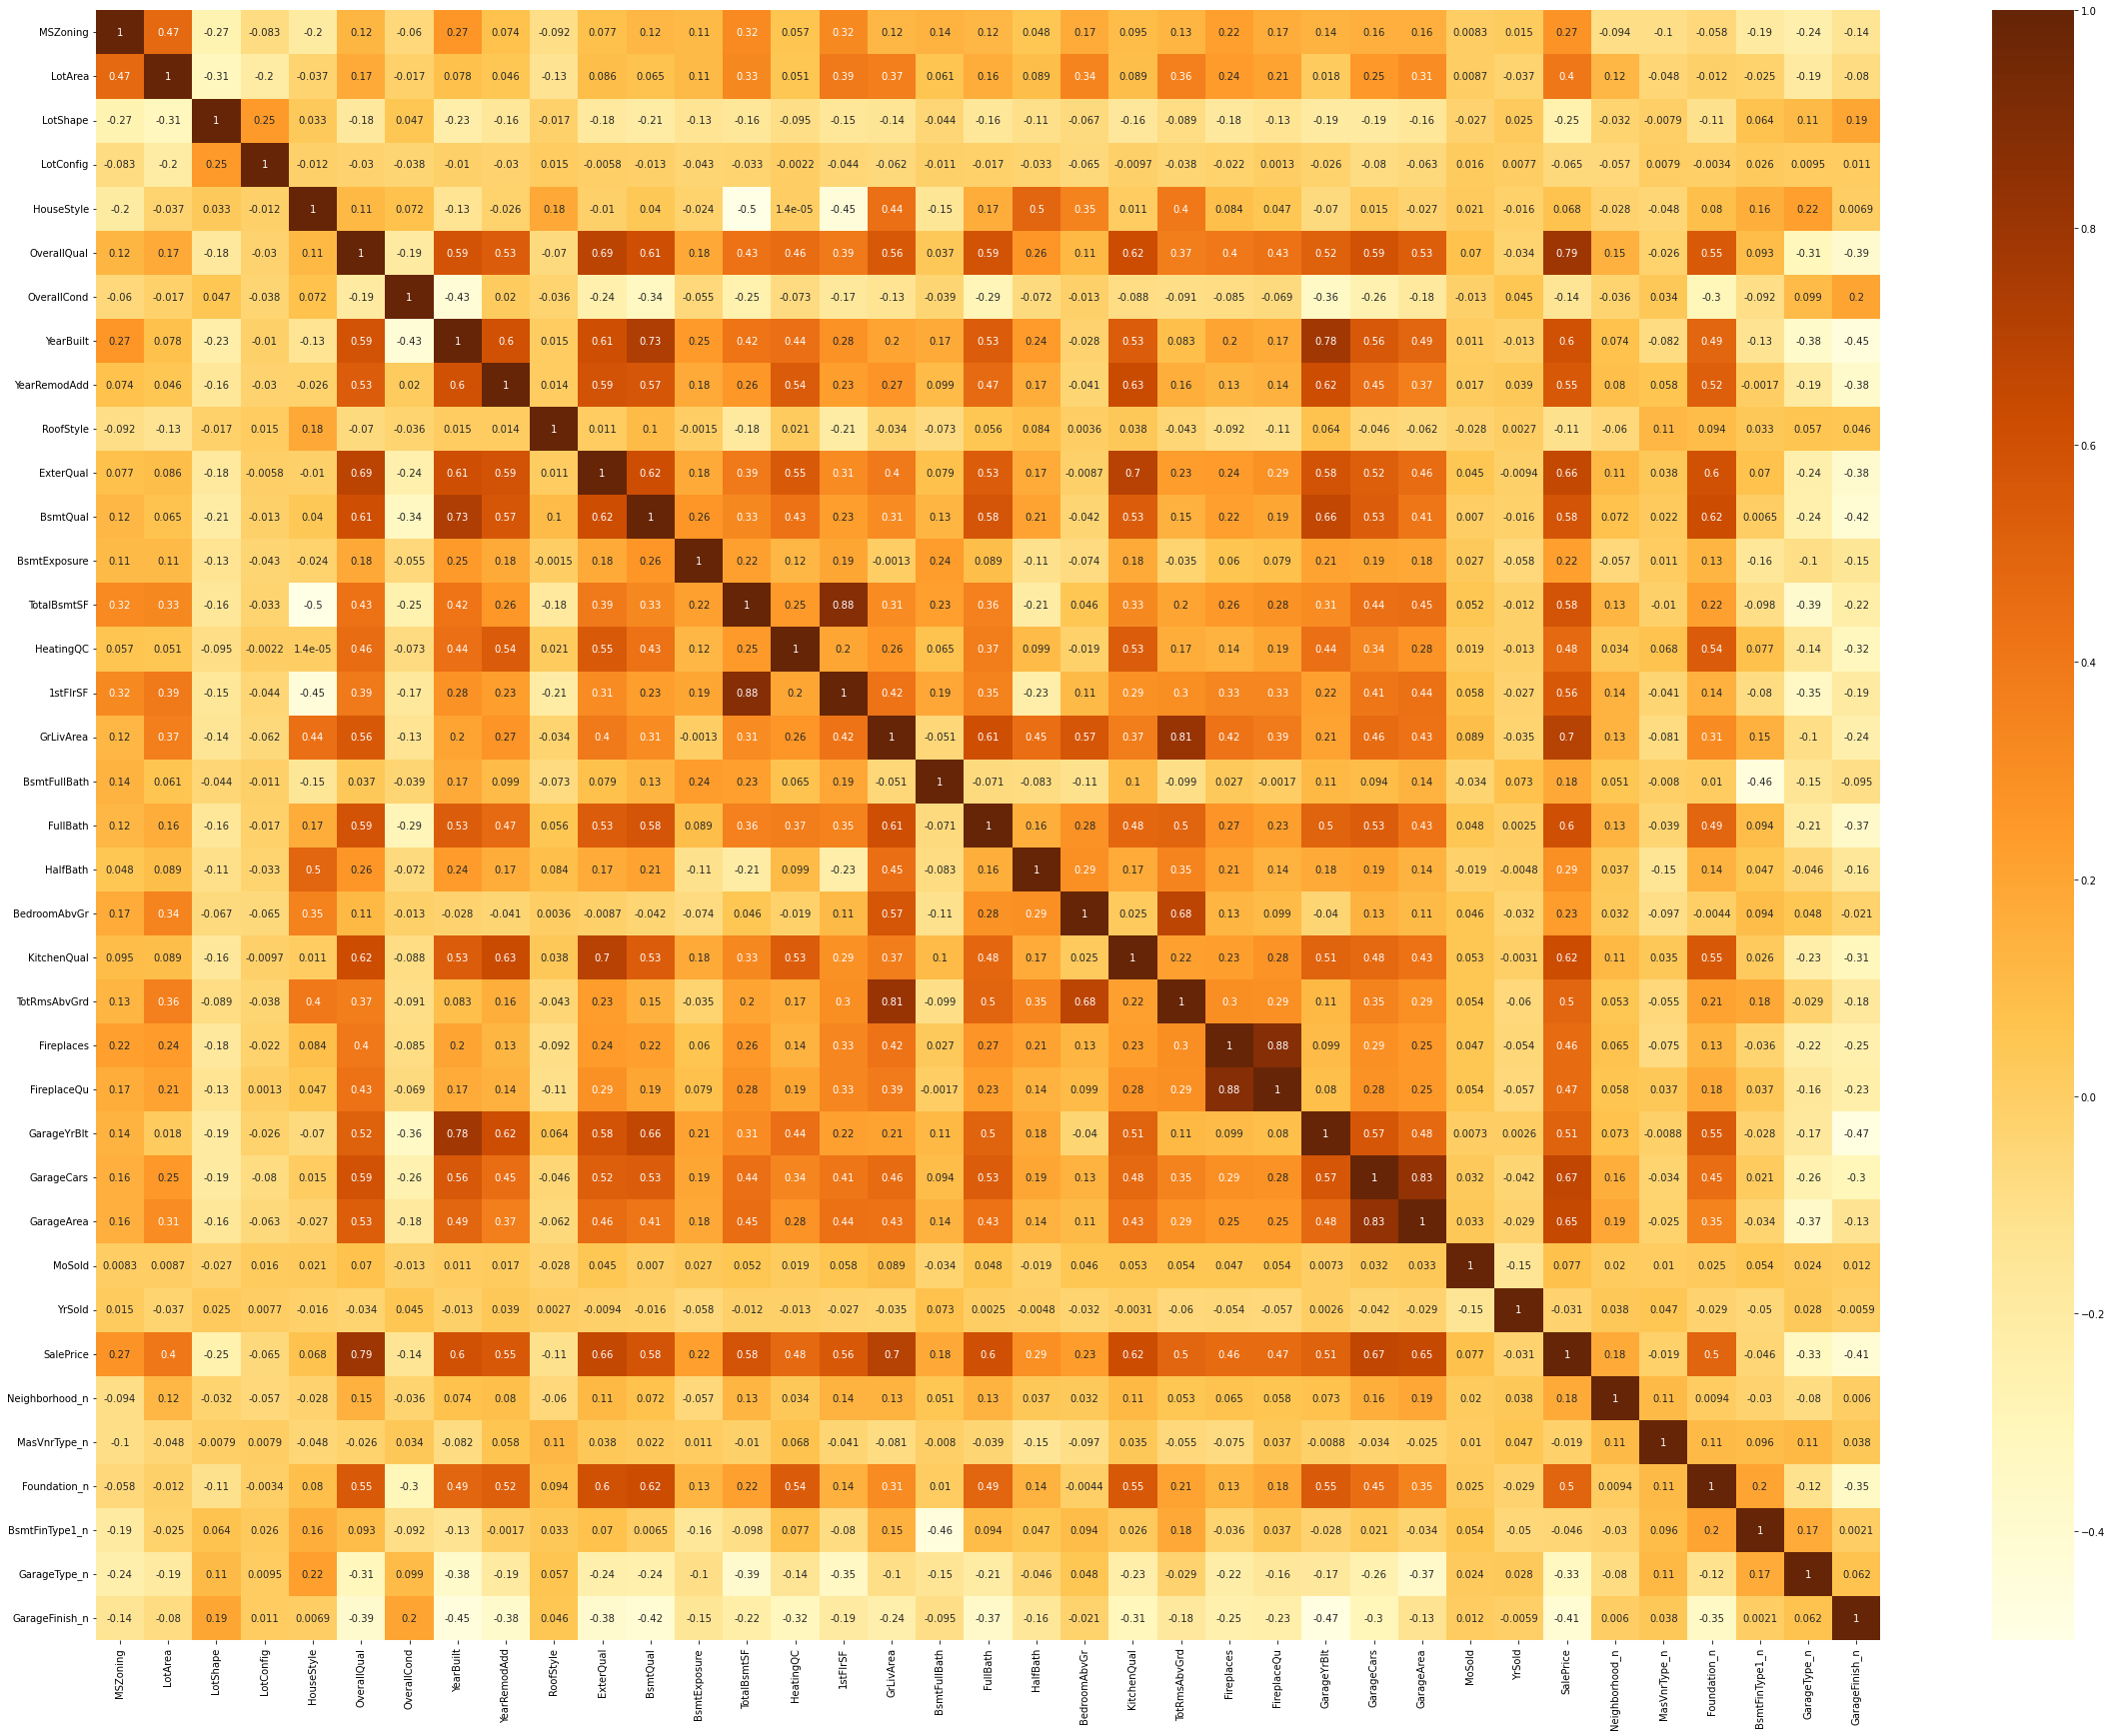

In [11]:
# Visualizing the correlation
plt.figure(figsize=[40,30])
sns.heatmap(sales.corr(), annot=True,cmap='YlOrBr')
plt.show()

__SalePrice has strong relation with following features:__
1. OverallCond
2. YearBuilt
3. YearRemodAdd
4. ExterQual
5. BsmtQual
6. TotalBsmtSF
7. 1stFlrSF
8. GrLivArea
9. FullBath
10. KitchenQual
11. GarageYrBlt
12. GarageCars
13. GarageArea
14. Foundation

__Note:-__ A lot of features are showing significant correlation

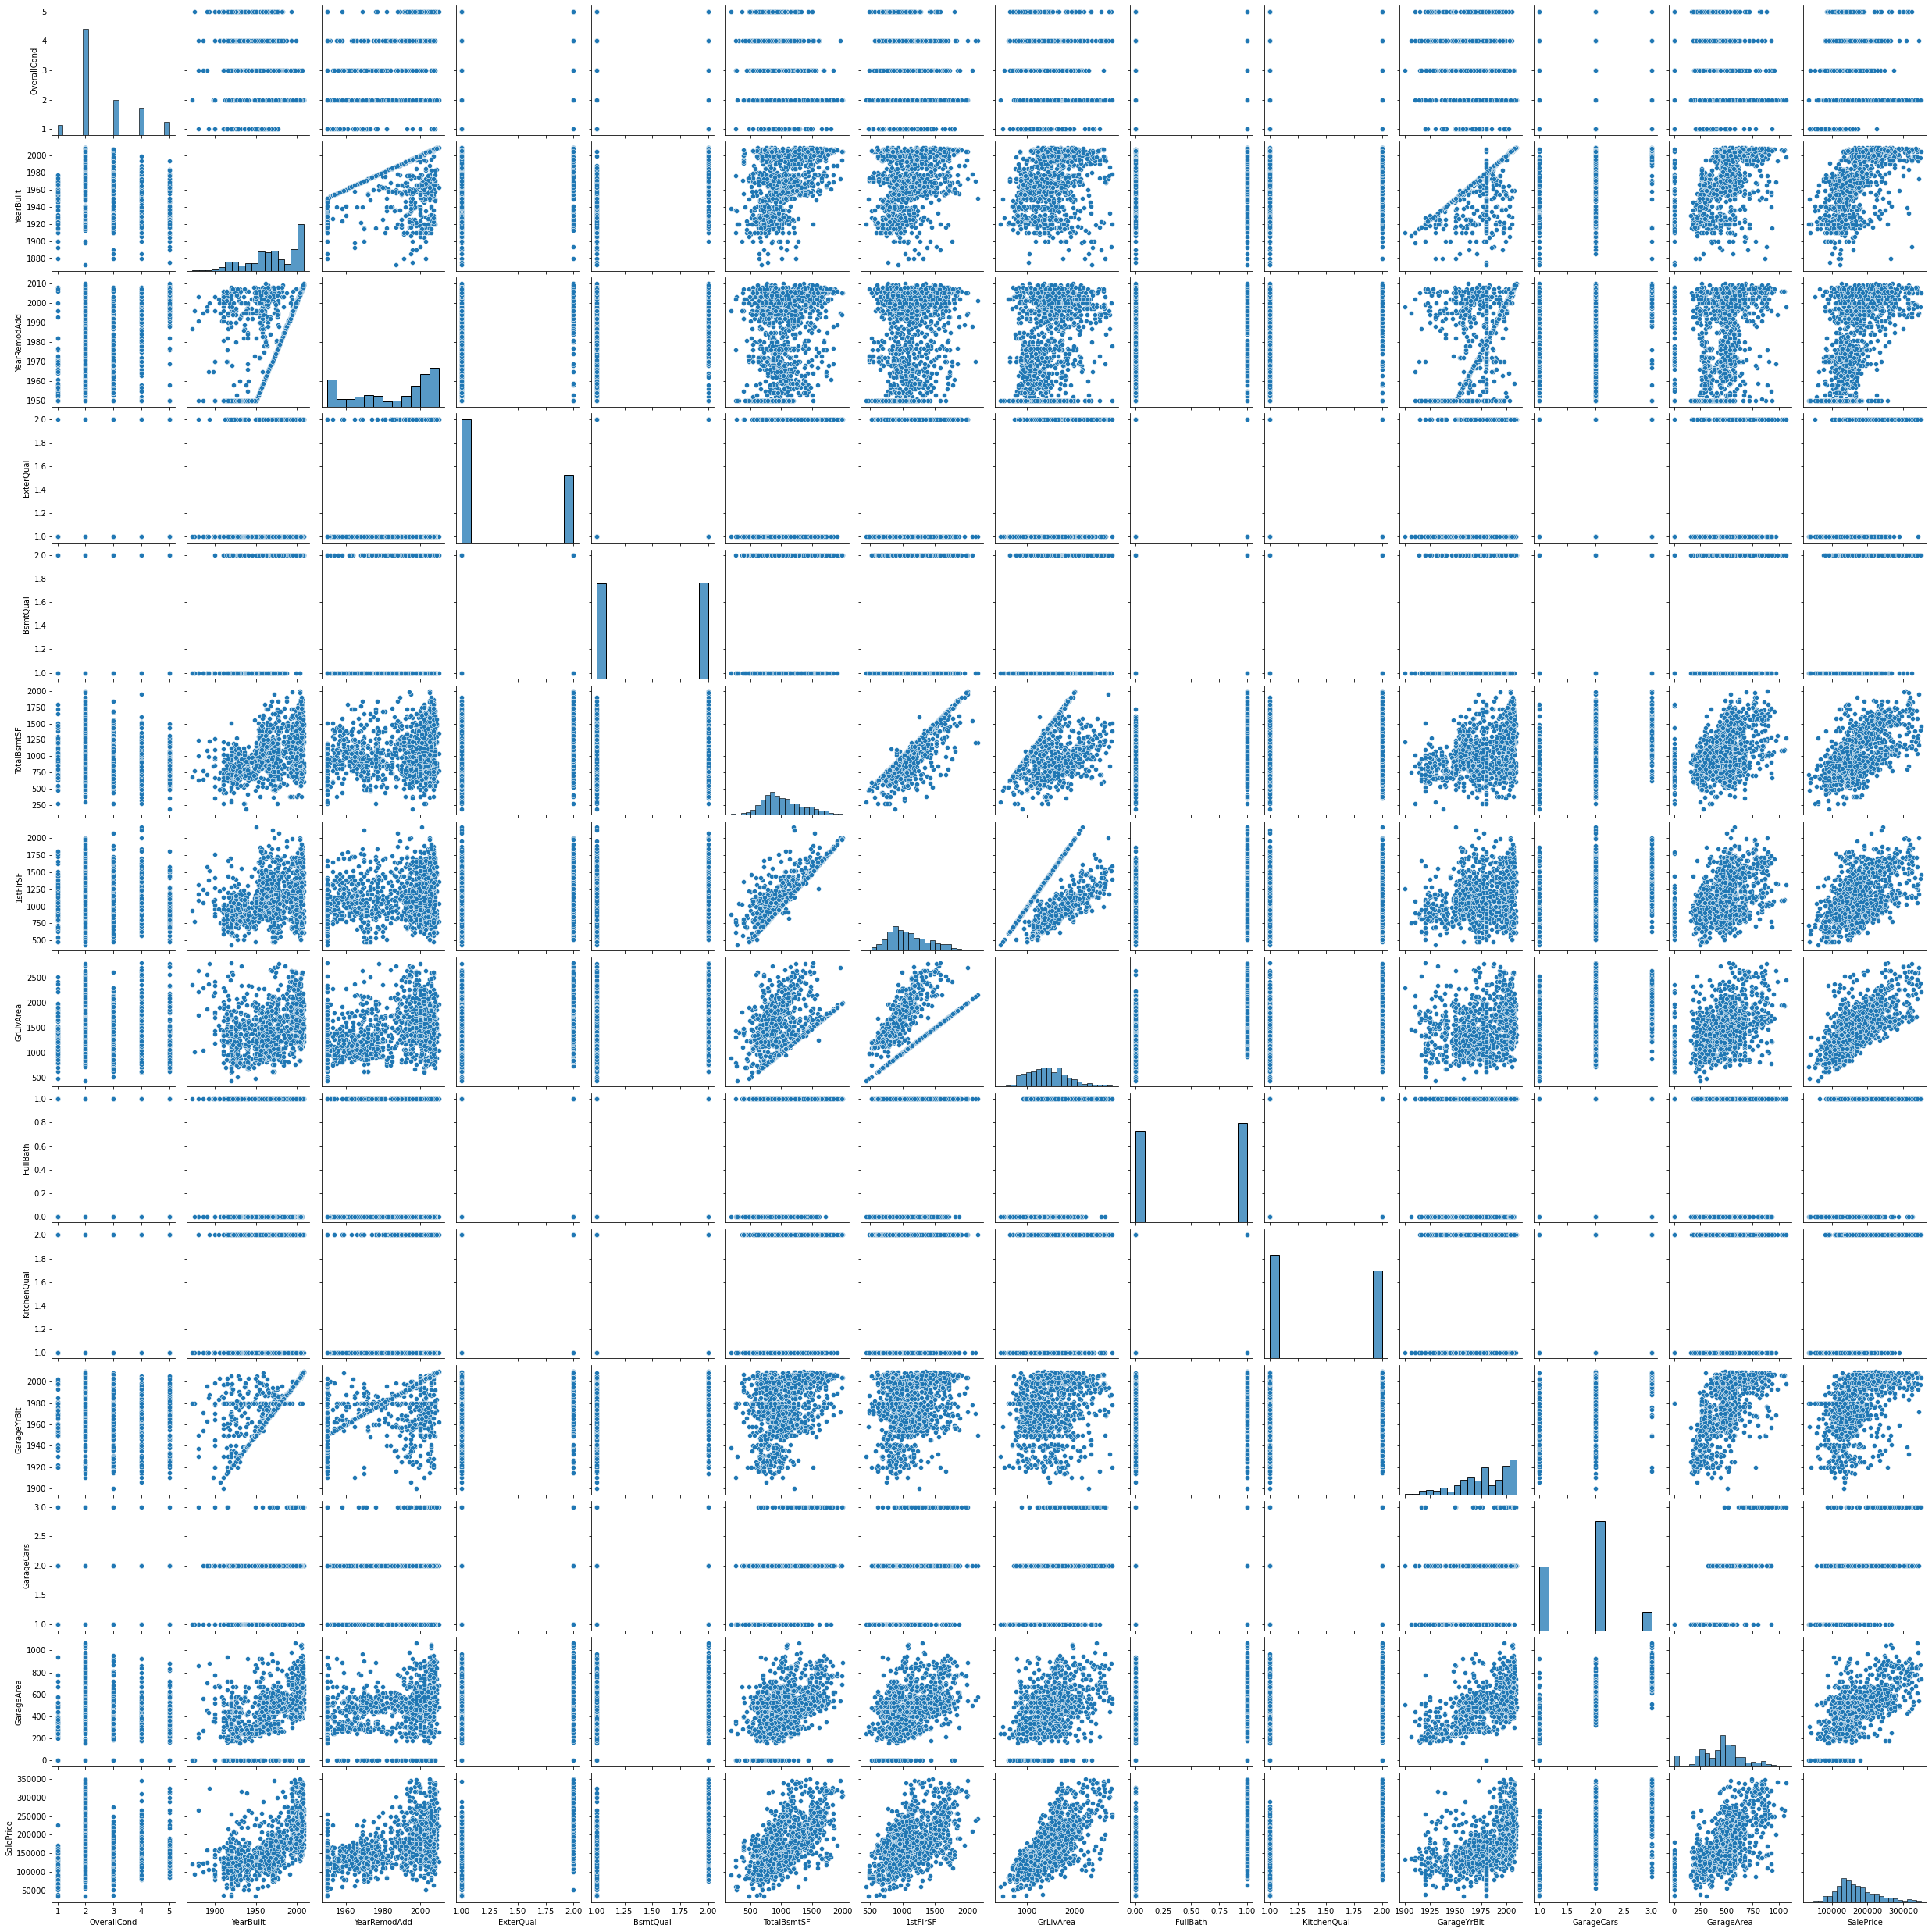

In [12]:
# Visualizing the relation between important variables
sns.pairplot(sales[[
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "ExterQual",
    "BsmtQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "FullBath",
    "KitchenQual",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "Foundation",
    "SalePrice"
]])

In [13]:
# Dropping label encoded fields
sales.drop([
    "Neighborhood_n",
    "MasVnrType_n",
    "BsmtFinType1_n",
    "GarageType_n",
    "GarageFinish_n",
    "Foundation_n"
], axis=1, inplace=True)


# Creating dummy variables for the categorical variables and concatenating with the dataframe
sales = pd.concat([
    sales,
    pd.get_dummies(sales.Neighborhood, drop_first=True, prefix="Neighborhood_"),
    pd.get_dummies(sales.MasVnrType, drop_first=True, prefix="MasVnrType_"),
    pd.get_dummies(sales.Foundation, drop_first=True, prefix="Foundation_"),
    pd.get_dummies(sales.BsmtFinType1, drop_first=True, prefix="BsmtFinType1_"),
    pd.get_dummies(sales.GarageType, drop_first=True, prefix="GarageType_"),
    pd.get_dummies(sales.GarageFinish, drop_first=True, prefix="GarageFinish_")
], axis=1)


# dropping all the categorical variables
sales.drop([
    "Neighborhood",
    "MasVnrType",
    "BsmtFinType1",
    "GarageType",
    "GarageFinish",
    "Foundation"
], axis=1, inplace=True)

In [14]:
# Available columns for model building
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSZoning               1284 non-null   int64  
 1   LotArea                1284 non-null   int64  
 2   LotShape               1284 non-null   int64  
 3   LotConfig              1284 non-null   int64  
 4   HouseStyle             1284 non-null   int64  
 5   OverallQual            1284 non-null   int64  
 6   OverallCond            1284 non-null   int64  
 7   YearBuilt              1284 non-null   int64  
 8   YearRemodAdd           1284 non-null   int64  
 9   RoofStyle              1284 non-null   int64  
 10  ExterQual              1284 non-null   int64  
 11  BsmtQual               1284 non-null   int64  
 12  BsmtExposure           1284 non-null   int64  
 13  TotalBsmtSF            1284 non-null   int64  
 14  HeatingQC              1284 non-null   int64  
 15  1stF

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
# splitting train-test data
trainData, testData = train_test_split(sales, test_size=0.2, random_state=100)

print("Train data: ",trainData.shape[0])
print("Test data: ",testData.shape[0])

# Scaling some numeric variables
scaler = MinMaxScaler()
np.random.seed(0)

num_vars = []

for c in sales.columns:
    if pd.api.types.is_numeric_dtype(sales[c]) and sales[c].max() > 1:
        num_vars.append(c)

# Fitting and transforming the train data
trainData[num_vars] = scaler.fit_transform(trainData[num_vars])
# Transforming the test data on Training scale
testData[num_vars] = scaler.transform(testData[num_vars])

Train data:  1027
Test data:  257


In [17]:
y_train = trainData.pop("SalePrice")
y_test = testData.pop("SalePrice")

# Defining a function to find VIF of model features
def find_vif(df, features):
    X_train = df[features]
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print("\n\n\nVIF:\n########\n",vif.to_string(index = False))


# Generate the metrics for the models
def generateMetric(X_train, X_test, model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return [
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test),
        np.sum(np.square(y_train - y_pred_train)),
        np.sum(np.square(y_test - y_pred_test)),
        mean_squared_error(y_train, y_pred_train)**0.5,
        mean_squared_error(y_test, y_pred_test)**0.5
    ]


# Generates all three type of models and returns the metrices and model objects
def build_model(trainData, testData, features):
    X_train = trainData[features]
    X_test = testData[features]
    metrics = []
    # cross validation
    folds = 5
    
    lgr = LinearRegression()
    lgr.fit(X_train, y_train)
    metrics.append(generateMetric(X_train, X_test, lgr))
    
    # list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
    # it will not handle the overfitting
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
     4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

    ridge = Ridge()
    model_cv = GridSearchCV(estimator = ridge,  param_grid = params, scoring= 'neg_mean_absolute_error',  
                            cv = folds, return_train_score=True, verbose = 0)            
    model_cv.fit(X_train, y_train) 
    alphaRidge = model_cv.best_params_.get('alpha')
    ridge = Ridge(alpha=alphaRidge)
    ridge.fit(X_train, y_train)
    metrics.append(generateMetric(X_train, X_test, ridge))
    
    lasso = Lasso()
    # cross validation
    model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', 
                            cv = folds, return_train_score=True, verbose = 0)            
    model_cv.fit(X_train, y_train) 
    alphaLasso = model_cv.best_params_.get('alpha')
    lasso = Lasso(alpha=alphaLasso)
    lasso.fit(X_train, y_train) 
    metrics.append(generateMetric(X_train, X_test, lasso))

    metrics = pd.DataFrame({
        'Linear Regression': metrics[0],
        'Ridge Regression': metrics[1],
        'Lasso Regression': metrics[2]
        }, index=['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)'])
    
    metrics.index.name = "Metric"
    
    return { "Linear" : lgr, "Ridge" : ridge, "Lasso" : lasso, 'Metrics' : metrics, 'alphaLasso': alphaLasso, 'alphaRidge': alphaRidge  }


# Get calculated coefficients on demand
def getCoefficients(models, features):
    coffs = pd.DataFrame({
        'Linear': models.get('Linear').coef_,
        'Ridge': models.get('Ridge').coef_,
        'Lasso': models.get('Lasso').coef_
    },index=features)
    
    coffs.index.name = "Features"
    
    return coffs

In [18]:
# Using RFE for feature selection
model = LinearRegression()
rfe = RFE(model, 30)
fit = rfe.fit(trainData, y_train)

selectedColumns = []
for index, rank in enumerate(fit.ranking_):
    if rank == 1:
        selectedColumns.append(trainData.columns[index])
        
print("Selected Columns by RFE :\n\n",selectedColumns)

Selected Columns by RFE :

 ['MSZoning', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageArea', 'Neighborhood__BrDale', 'Neighborhood__BrkSide', 'Neighborhood__Crawfor', 'Neighborhood__Edwards', 'Neighborhood__Gilbert', 'Neighborhood__NPkVill', 'Neighborhood__NoRidge', 'Neighborhood__NridgHt', 'Neighborhood__Somerst', 'Neighborhood__StoneBr', 'Neighborhood__Veenker', 'Foundation__PConc', 'BsmtFinType1__GLQ', 'GarageFinish__RFn', 'GarageFinish__Unf']


In [19]:
# Building model with all the columns
models = build_model(trainData, testData, selectedColumns)
print(models.get('Metrics'))
find_vif(trainData, selectedColumns)

                  Linear Regression  Ridge Regression  Lasso Regression
Metric                                                                 
R2 Score (Train)           0.901258          0.901115          0.900745
R2 Score (Test)            0.887711          0.887912          0.888337
RSS (Train)                3.511314          3.516422          3.529553
RSS (Test)                 1.050039          1.048160          1.044185
MSE (Train)                0.058472          0.058515          0.058624
MSE (Test)                 0.063920          0.063863          0.063741



VIF:
########
              Features   VIF
          TotalBsmtSF 43.09
             1stFlrSF 29.18
            YearBuilt 27.84
            GrLivArea 27.25
         TotRmsAbvGrd 12.93
           GarageArea 12.40
          OverallQual 12.21
              LotArea 12.12
         YearRemodAdd  9.18
             MSZoning  8.08
             FullBath  5.34
            HeatingQC  4.74
          OverallCond  4.61
    Foundation

In [20]:
# removing 'TotRmsAbvGrd' feature as it has high VIF
selectedColumns.remove('TotRmsAbvGrd')

# Rebuilding model
models = build_model(trainData, testData, selectedColumns)
print(models.get('Metrics'))
find_vif(trainData, selectedColumns)

                  Linear Regression  Ridge Regression  Lasso Regression
Metric                                                                 
R2 Score (Train)           0.900843          0.900619          0.900376
R2 Score (Test)            0.886771          0.887304          0.887668
RSS (Train)                3.526090          3.534049          3.542697
RSS (Test)                 1.058829          1.053846          1.050439
MSE (Train)                0.058595          0.058661          0.058733
MSE (Test)                 0.064187          0.064036          0.063932



VIF:
########
              Features   VIF
          TotalBsmtSF 43.08
             1stFlrSF 29.17
            YearBuilt 27.59
            GrLivArea 14.15
           GarageArea 12.39
          OverallQual 12.20
              LotArea 11.91
         YearRemodAdd  9.17
             MSZoning  8.04
             FullBath  5.28
            HeatingQC  4.74
          OverallCond  4.61
    Foundation__PConc  4.60
    GarageFini

In [21]:
# Removing 'TotalBsmtSF' feature as it has high VIF
selectedColumns.remove('TotalBsmtSF')

# Rebuilding model
models = build_model(trainData, testData, selectedColumns)
print(models.get('Metrics'))
find_vif(trainData, selectedColumns)

                  Linear Regression  Ridge Regression  Lasso Regression
Metric                                                                 
R2 Score (Train)           0.894797          0.894782          0.894495
R2 Score (Test)            0.883229          0.883281          0.883242
RSS (Train)                3.741063          3.741602          3.751810
RSS (Test)                 1.091951          1.091469          1.091826
MSE (Train)                0.060355          0.060359          0.060441
MSE (Test)                 0.065183          0.065169          0.065179



VIF:
########
              Features   VIF
            YearBuilt 23.53
            GrLivArea 13.94
           GarageArea 12.39
          OverallQual 12.13
              LotArea 11.84
             1stFlrSF  9.25
         YearRemodAdd  9.13
             MSZoning  8.04
             FullBath  5.28
            HeatingQC  4.74
          OverallCond  4.61
    Foundation__PConc  4.60
    GarageFinish__Unf  3.31
          Fire

In [22]:
# Removing 'YearBuilt' as it has high VIF
selectedColumns.remove('YearBuilt')

# Rebuilding model
models = build_model(trainData, testData, selectedColumns)
print(models.get('Metrics'))
find_vif(trainData, selectedColumns)

                  Linear Regression  Ridge Regression  Lasso Regression
Metric                                                                 
R2 Score (Train)           0.882576          0.881951          0.882284
R2 Score (Test)            0.877128          0.876293          0.877218
RSS (Train)                4.175653          4.197878          4.186064
RSS (Test)                 1.149003          1.156815          1.148161
MSE (Train)                0.063764          0.063934          0.063844
MSE (Test)                 0.066864          0.067091          0.066840



VIF:
########
              Features   VIF
            GrLivArea 13.87
           GarageArea 11.88
          OverallQual 11.75
              LotArea 11.69
             1stFlrSF  9.12
         YearRemodAdd  8.37
             MSZoning  6.94
             FullBath  5.25
            HeatingQC  4.70
          OverallCond  4.60
    Foundation__PConc  4.45
    GarageFinish__Unf  3.13
          FireplaceQu  2.70
    BsmtFinTyp

In [23]:
# Removing 'FullBath' because this variable has high correlation with other variables
selectedColumns.remove('FullBath')

# Rebuilding model
models = build_model(trainData, testData, selectedColumns)
print(models.get('Metrics'))
find_vif(trainData, selectedColumns)

                  Linear Regression  Ridge Regression  Lasso Regression
Metric                                                                 
R2 Score (Train)           0.882406          0.881907          0.882135
R2 Score (Test)            0.877800          0.876385          0.877607
RSS (Train)                4.181728          4.199439          4.191359
RSS (Test)                 1.142722          1.155953          1.144524
MSE (Train)                0.063811          0.063946          0.063884
MSE (Test)                 0.066681          0.067066          0.066734



VIF:
########
              Features   VIF
           GarageArea 11.87
          OverallQual 11.67
              LotArea 11.59
            GrLivArea 11.23
             1stFlrSF  9.04
         YearRemodAdd  8.28
             MSZoning  6.94
            HeatingQC  4.69
          OverallCond  4.49
    Foundation__PConc  4.41
    GarageFinish__Unf  3.07
          FireplaceQu  2.65
    BsmtFinType1__GLQ  2.31
         BsmtF

__Note:-__ Tried removing more features because still VIF is little high but removal of any feature now impacts significantly on the model performance indices. So keeping this model as final model.

<h2>Final Model</h2>

In [24]:
print("--------------------------Metrics--------------------- \n\n",models.get('Metrics'))
print(f"\n\n-------------------------Lambda values--------------------\n\nLambda for Lasso: {models.get('alphaLasso')},\nLambda for Ridge: {models.get('alphaRidge')}")
# Getting Cofficients for all the models
print("\n\n----------------------Coeffiecients-------------------------\n\n",getCoefficients(models, selectedColumns))

--------------------------Metrics--------------------- 

                   Linear Regression  Ridge Regression  Lasso Regression
Metric                                                                 
R2 Score (Train)           0.882406          0.881907          0.882135
R2 Score (Test)            0.877800          0.876385          0.877607
RSS (Train)                4.181728          4.199439          4.191359
RSS (Test)                 1.142722          1.155953          1.144524
MSE (Train)                0.063811          0.063946          0.063884
MSE (Test)                 0.066681          0.067066          0.066734


-------------------------Lambda values--------------------

Lambda for Lasso: 0.0001,
Lambda for Ridge: 2.0


----------------------Coeffiecients-------------------------

                          Linear     Ridge     Lasso
Features                                           
MSZoning               0.036538  0.036077  0.036054
LotArea                0.117626  0.

### Validating assumptions

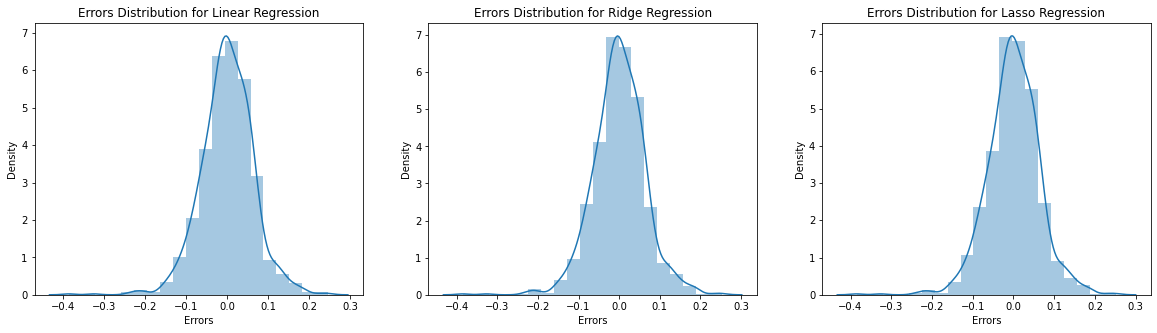

In [25]:
# Visualising assumptions
X_train = trainData[selectedColumns]

y_train_pred_Linear = models.get('Linear').predict(X_train)
y_train_pred_Ridge = models.get('Ridge').predict(X_train)
y_train_pred_Lasso = models.get('Lasso').predict(X_train)

# Plot the histogram of the error terms
fig = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot((y_train - y_train_pred_Linear), bins = 20)
plt.xlabel('Errors', fontsize = 10)
plt.title('Errors Distribution for Linear Regression')

plt.subplot(1,3,2)
sns.distplot((y_train - y_train_pred_Ridge), bins = 20)
plt.xlabel('Errors', fontsize = 10)
plt.title('Errors Distribution for Ridge Regression')

plt.subplot(1,3,3)
sns.distplot((y_train - y_train_pred_Lasso), bins = 20)
plt.xlabel('Errors', fontsize = 10)
plt.title('Errors Distribution for Lasso Regression')

plt.show()

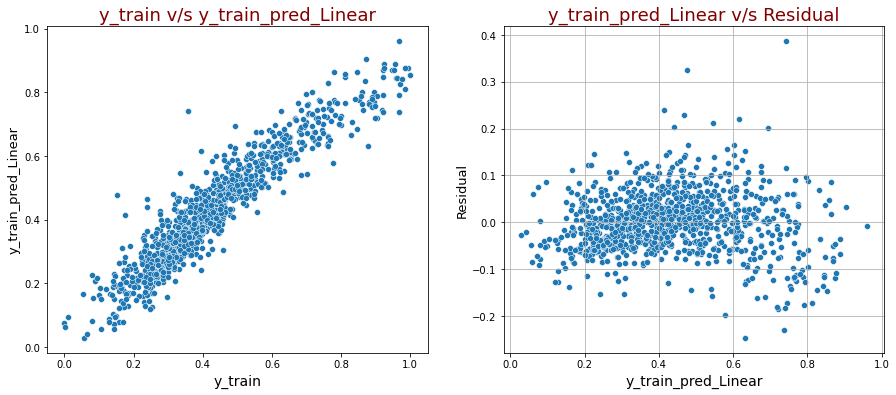

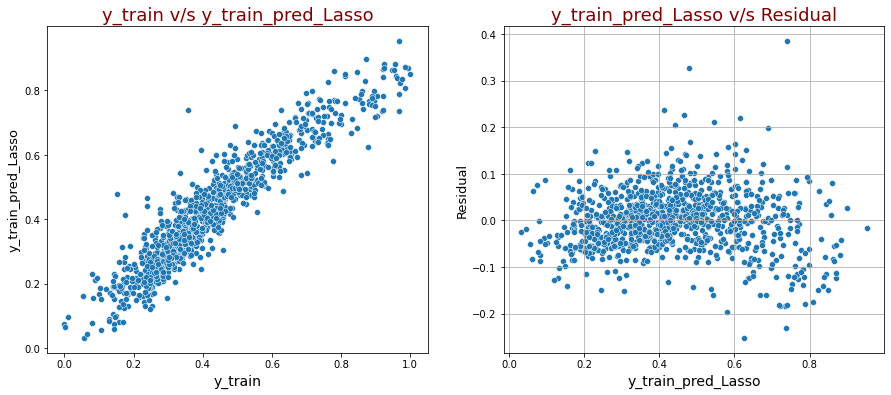

In [26]:
# Plotting y_test and y_train_pred_Linear to understand the spread.
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y_train,y_train_pred_Linear)
plt.xlabel('y_train', fontsize=14)
plt.ylabel('y_train_pred_Linear', fontsize=13) 
plt.title("y_train v/s y_train_pred_Linear",fontdict={"fontsize":18,"color":"Maroon"})


plt.subplot(1,2,2)
sns.scatterplot(y_train_pred_Linear,y_train_pred_Linear - y_train)
plt.xlabel('y_train_pred_Linear', fontsize=14) 
plt.ylabel('Residual', fontsize=13) 
plt.title("y_train_pred_Linear v/s Residual",fontdict={"fontsize":18,"color":"Maroon"})
plt.grid()
plt.show()

# Plotting y_test and y_train_pred_Ridge to understand the spread.
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y_train,y_train_pred_Ridge)
plt.xlabel('y_train', fontsize=14)
plt.ylabel('y_train_pred_Ridge', fontsize=13) 
plt.title("y_train v/s y_train_pred_Ridge",fontdict={"fontsize":18,"color":"Maroon"})


plt.subplot(1,2,2)
sns.scatterplot(y_train_pred_Ridge,y_train_pred_Ridge - y_train)
plt.xlabel('y_train_pred_Ridge', fontsize=14) 
plt.ylabel('Residual', fontsize=13) 
plt.title("y_train_pred_Ridge v/s Residual",fontdict={"fontsize":18,"color":"Maroon"})
plt.grid()
plt.show()

# Plotting y_test and y_train_pred_Lasso to understand the spread.
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(y_train,y_train_pred_Lasso)
plt.xlabel('y_train', fontsize=14)
plt.ylabel('y_train_pred_Lasso', fontsize=13) 
plt.title("y_train v/s y_train_pred_Lasso",fontdict={"fontsize":18,"color":"Maroon"})


plt.subplot(1,2,2)
sns.scatterplot(y_train_pred_Lasso,y_train_pred_Lasso - y_train)
plt.xlabel('y_train_pred_Lasso', fontsize=14) 
plt.ylabel('Residual', fontsize=13) 
plt.title("y_train_pred_Lasso v/s Residual",fontdict={"fontsize":18,"color":"Maroon"})
plt.grid()
plt.show()

<h1 style="color:maroon;">Conclusion</h1>

__Following are the features (Varaibles) which are significant in predicting the House Price__<br><br>
<table><tr><td style="text-align:center;border:1px solid;">MSZoning</td><td style="text-align:center;border:1px solid;">LotArea</td><td style="text-align:center;border:1px solid;">OverallQual</td><td style="text-align:center;border:1px solid;">OverallCond</td></tr><tr><td style="text-align:center;border:1px solid;">YearRemodAdd</td><td style="text-align:center;border:1px solid;">HeatingQC</td><td style="text-align:center;border:1px solid;">1stFlrSF</td><td style="text-align:center;border:1px solid;">GrLivArea</td></tr><tr><td style="text-align:center;border:1px solid;">BsmtFullBath</td><td style="text-align:center;border:1px solid;">FireplaceQu</td><td style="text-align:center;border:1px solid;">GarageArea</td><td style="text-align:center;border:1px solid;">Foundation__PConc</td></tr><tr><td style="text-align:center;border:1px solid;">Neighborhood__BrDale</td><td style="text-align:center;border:1px solid;">Neighborhood__BrkSide</td><td style="text-align:center;border:1px solid;">Neighborhood__Crawfor</td><td style="text-align:center;border:1px solid;">Neighborhood__Edwards</td></tr><tr><td style="text-align:center;border:1px solid;">Neighborhood__Gilbert</td><td style="text-align:center;border:1px solid;">Neighborhood__NPkVill</td><td style="text-align:center;border:1px solid;">Neighborhood__NoRidge</td><td style="text-align:center;border:1px solid;">Neighborhood__NridgHt</td></tr><tr><td style="text-align:center;border:1px solid;">Neighborhood__Somerst</td><td style="text-align:center;border:1px solid;">Neighborhood__StoneBr</td><td style="text-align:center;border:1px solid;">Neighborhood__Veenker</td><td style="text-align:center;border:1px solid;">BsmtFinType1__GLQ</td></tr><tr><td style="text-align:center;border:1px solid;">GarageFinish__RFn</td><td style="text-align:center;border:1px solid;">GarageFinish__Unf</td></tr></table>

<br><br>
__The most significant variable which has higher impact on the prediction is:__
<span style="background-color:yellow;"><b>'GrLivArea'</b> (Above ground living area square feet)</span>
<br><br><br>
`Training` <b>$R^2$</b> score for `Linear`, `Ridge` and `Lasso` Regression is `0.882406`, `0.881907`, `0.882135` respectively
<br>And `Test` <b>$R^2$</b> score for `Linear`, `Ridge` and `Lasso` Regression is `0.877800`, `0.876385`, `0.877607` respectively

**Business Understanding**
1. `GrLivArea` : As the above ground living area increases then the Sale price of the house also increases.
2. `GarageArea` : As garage area increases inturn the number of cars accomodated in the garage increases then the House sale price increases.
3. `OverallQual` : If overall quality of house is good then Sale price increases.
4. `LotArea` : If lot area increases then increases the House sale price.
5. `MSZoning`: If resident present in 'Residential Low Density' area that increases the sale price.
6. `HeatingQC` : If house has good heating qualities then also sale price increases.
7. `OverallCond` : If overall condition of house is good that positively appriciates the price of house.
8. `1stFlrSF` : If house has 1st floor (i.e. multistory) and area of that floor ig good the price for that house becomes high.
9. `BsmtFullBath` : If house has bathrooms in basement that increases house price.
10. `FireplaceQu` : If house has fire place and in good condition that also increases house price.
11. `GarageFinish` : If the garage is unfinished or has rough finish then that decreases house price.
12. `Foundation` : If foundation of the house is made of 'Poured Contrete' then that house has comparatively high price.
13. `Neighbourhood` : For some Neighbourhood prices are higher and for others it is lower.